In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

## Group Assignment
### Team Number: 03
### Team Member Names: Sherry, Kelly, Ifan
### Team Strategy Chosen: SAFE

### Introduction 

Our safe portfolio generator follows the strategy to have two portfolios, before combining them altogether using the Monte Carlo algorithm. The first portfolio contains a number of stocks with the lowest betas and standard deviation, computed using a point system that will be explained further later on. The second portfolio contains a number of stocks that are negatively correlated to help offset any fluctuations. We also account for diversification, ensuring that there are not too many industries dominating the portfolio, to further reduce overall risk. We finally find the combined portfolio weighting using Monte Carlo. 

To start, we will filter through the given list of stocks to drop any stocks that do not meet our requirements. 

In [2]:
max_stocks = 25 #The total number of stocks we can possibly have
tickers_df = pd.read_csv('Tickers_Example.csv')
#When the CSV file is read, it takes the first ticker and makes it the name of the column, so we need to extract it
tickers_list = list(tickers_df.columns)
#Now add the rest of the tickers in after it:
tickers_list += tickers_df.iloc[:, 0].tolist()
tickers_num = len(tickers_list)

#Dates to pull closing data from, change as needed
start_date = '2020-01-01'
end_date = '2022-11-25'

# Dictionary of all the stocks
stocks_dict = {}
stocks_full_info = {}

# Function produces the daily closing prices of a stock
def get_closing_prices(ticker, start, end):
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start, end=end) #Daily
    return hist.Close

for i in range (tickers_num):
    stocks_dict[tickers_list[i]] = get_closing_prices(tickers_list[i], start_date, end_date)
    stocks_full_info[tickers_list[i]] = yf.Ticker(tickers_list[i])

# Create DataFrame
all_prices = pd.DataFrame(stocks_dict)

tickers_list_temp = tickers_list.copy()
#Some tickers are delisted, so we drop those columns entirely
for i in range (tickers_num):
    if all_prices[tickers_list[i]].isnull().all():
        all_prices.drop(columns=[tickers_list[i]], inplace=True)
        tickers_list_temp.remove(tickers_list[i]) #Getting rid of the tickers from our list too to match
        stocks_full_info.pop(tickers_list[i]) #Do the same to the dictionary of yfinance ticker objects

tickers_list = tickers_list_temp.copy()
tickers_num = len(tickers_list)

#Drop the rows at the bottom of the DataFrame where only a few stocks have values and where the dates are strange
all_prices = all_prices.dropna() 

print(tickers_list)

#Display the entire DataFrame, so that we can manually check to make sure the values are sensible
#using threading 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_prices)

- AGN: No data found, symbol may be delisted
- CELG: No data found, symbol may be delisted
- PCLN: No data found for this date range, symbol may be delisted
- RTN: No data found, symbol may be delisted
- TWX: No data found for this date range, symbol may be delisted
['AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS', 'GM', 'GOOG', 'JPM', 'KMI', 'KO', 'LLY', 'LMT', 'MO', 'MON', 'MRK', 'MS', 'MSFT', 'NEE', 'NKE', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RY.TO', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TD.TO', 'TGT', 'TXN', 'UNH', 'UNP', 'UPS', 'USB']


,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,BK,BLK,BMY,C,CAT,CL,CMCSA,COF,COP,COST,CSCO,CVS,GM,GOOG,JPM,KMI,KO,LLY,LMT,MO,MON,MRK,MS,MSFT,NEE,NKE,ORCL,OXY,PEP,PFE,PG,PM,PYPL,QCOM,RY.TO,SBUX,SLB,SO,SPG,T,TD.TO,TGT,TXN,UNH,UNP,UPS,USB
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-16 00:00:00,124.265900,102.991287,114.960411,257.676697,45.678761,154.593002,140.325363,255.210007,36.480057,259.920013,43.974262,698.315796,58.655910,68.990311,217.884537,72.816872,55.796642,124.143265,52.917683,323.250336,47.165886,72.076775,56.989883,104.625999,146.212967,14.289574,48.974052,186.289169,332.890930,43.404179,9.785,69.581032,78.276802,234.083527,72.760925,142.769958,64.960365,27.963648,128.622894,33.759575,123.469925,80.504585,249.309998,129.892349,108.809334,107.442192,27.394434,57.139622,107.247574,19.613205,76.842155,174.705933,169.330276,347.556396,205.282028,155.261246,50.686966
2021-03-17 00:00:00,123.464317,97.601997,114.376945,258.410065,46.006893,156.786499,141.676697,263.589996,36.780510,264.149994,44.231030,703.289490,58.921234,69.244331,224.783005,72.759285,55.277512,127.196358,53.151505,325.166626,46.928493,71.059036,59.913212,104.554001,147.717865,14.558847,48.993179,182.219894,336.621368,43.702671,9.680,70.024918,79.528610,233.423752,70.425011,142.937775,64.348175,28.827278,128.248566,33.721897,122.971985,81.417343,251.470001,130.154770,109.203339,106.593010,27.638504,56.626534,108.208496,19.717844,76.935692,172.951218,171.442841,345.184448,205.863831,153.191971,51.298893
2021-03-18 00:00:00,119.278244,96.421921,114.853439,260.971985,46.151665,151.399506,139.620300,256.059998,37.739998,262.269989,44.411716,698.953186,59.063377,69.470131,221.944717,73.018456,53.710514,123.969337,49.924816,319.032532,46.339745,71.510300,59.134987,101.810997,150.156158,14.145960,48.352551,179.487518,343.746582,44.396221,9.770,69.997749,79.604492,227.200180,68.658592,141.309189,64.853462,26.425003,127.202385,33.703045,123.240097,82.658684,238.410004,126.102020,109.794342,103.852425,26.603647,56.346664,106.908958,19.626287,77.655937,174.124283,166.672836,354.858337,208.831070,152.762878,52.974648
2021-03-19 00:00:00,118.743858,96.096695,116.934433,257.930908,45.196201,153.748001,137.789124,255.820007,37.342628,267.070007,44.078869,704.660889,59.413982,68.689262,216.758804,71.972176,53.316357,122.152946,49.195305,324.890015,46.510677,70.262138,59.683735,102.160004,147.765488,14.289574,48.582031,179.838806,340.505249,44.378662,9.750,70.215141,78.656136,226.835800,68.378662,135.703049,64.387032,27.894163,129.093185,33.476917,122.579384,82.556946,241.279999,127.336311,109.325287,102.617226,26.408390,55.693642,106.790009,19.462788,77.094704,181.821762,168.221390,358.318268,204.409302,151.895126,51.976727
2021-03-22 00:00:00,122.108559,98.401108,118.120804,259.319489,44.617134,155.543503,137.044891,251.229996,36.499443,272.339996,42.994728,705.897095,60.058350,67.701393,217.461182,72.730476,54.191189,120.983879,48.858604,330.401825,47.764130,70.540565,57.967651,101.929497,143.793716,14.163912,48.763699,181.351395,342.989014,45.335590,9.700,70.215141,77.688812,232.389786,69.199135,136.472900,64.445343,27.258850,132.260529,33.919754,124.657318,83.232208,244.384995,130.319992,108.799965,103.804192,26.994160,55.684311,105.472168,19.613205,76.832794,182.296799,172.159775,359.572845,200.016647,153.582932,51.063541
2021-03-23 00:00:00,121.267380,97.416161,117.167809,260.131042,43.410744,156.875000,133.255234,241.250000,35.762867,267.209991,42.195889,692.038391,59.338173,66.713539,209.985397,74.631050,53.970081,118.268944,48.362904,336.180359,47.488743,69.033165,56.032074,102.648003,142.355469,14.074152,49.136600,179.243561,339.105103,44.343544,9.660,69.091850,75.033440,233.955521,71.448174,135.337830,65.368484,26.395224,133.853806,33.316738,126.974670,81.446930,243.770004,128.794128,108.668625,102.530388,26.037405,56.561234,101.042793,19.619745,76.439941,183.149933,170.897964,361.180237,201.742676,152.438660,50.442188
2021-03-24 00:

In [3]:
#--------------------------------------------------------------------------
#This block of code takes several minutes to run (with 50-something stocks)
#--------------------------------------------------------------------------

# Remove invalid stocks per assignment requirement (ones outside of the U.S & ones with average monthly volume of less than 200,000 shares)

df_diff_market = pd.DataFrame()

#Function runs for approx. 9 min for yfinance API
def filter_market(df):
    df_transposed = df.T
    mkt_lst = []
    
    for i in range(len(df_transposed)):
        # Populate market list
        temp = stocks_full_info[tickers_list[i]]
        mkt_lst.append(temp.info['market'])
    
    df_transposed['Market'] = mkt_lst
    
    # Drops the stocks in markets that are not in the U.S
    df_transposed.drop(df_transposed[df_transposed.Market != "us_market"].index, inplace=True)
    df_transposed = df_transposed.drop('Market', axis=1)

    return_df = df_transposed.T

    return return_df

df_diff_volume=[]

# Drops the stocks with volumes less than average monthly volume of 200,000
def filter_volume(df):

    start = "2022-01-01"
    end = "2022-10-31"

    df_transposed = df.T
    volume_lst = []

    for i in range(len(df_transposed)):
        ticker_hist = stocks_full_info[tickers_list[i]].history(start=start, end=end, interval="1mo")
        volume_hist = ticker_hist.loc[(ticker_hist.index >= pd.to_datetime(start)) & (ticker_hist.index <= pd.to_datetime(end))]
        volume_lst.append(volume_hist['Volume'].mean())

    # Drops the stocks with volumes less than average monthly volume of 200,000
    df_transposed["Volume"] = volume_lst

    df_transposed.drop(df_transposed[df_transposed.Volume < 200000].index, inplace=True)
    df_transposed = df_transposed.drop('Volume', axis=1)
    return_df = df_transposed.T

    return return_df

# Drops stocks with more than specified number of NaN values
max_number_of_nans = 20
all_prices = all_prices.loc[:, (all_prices.isnull().sum(axis=0) <= max_number_of_nans)]

#all_prices = filter_market(all_prices)
#display(all_prices)

In [4]:
# Update previously defined variables
all_prices = filter_market(all_prices)
all_prices = filter_volume(all_prices)

tickers_list = []
for col in all_prices.columns:
     tickers_list.append(col)

stocks_full_info.clear()
for i in range (len(tickers_list)):
    stocks_full_info[tickers_list[i]] = yf.Ticker(tickers_list[i])

tickers_num = len(tickers_list)

## Beta and Standard Deviation

Since we chose the safe investment strategy, we want to make sure the stocks we choose have the lowest volatility and risk. To do that, we can use two measures of a stock's volatility: standard deviation and beta. First, we have to define a function that calculates the beta value of a stock. In other words, how volatile it is compared to the market. We decided to use the S&P 500 as the market to compare all our stocks to, as it's one of the more reliable value weighted indexes in the United States. 

Beta essentially calculates how a stock moves in relation to the market. If it is negative, it moves opposite the market, on average, whereas if it's positive, it moves with the market. A value of 1 means that the stock perfectly follows the movement of the market; larger than 1 and it means the stock is more sensitive to market movements, moving up and down more than the market, in the same direction. If a stock has a beta closer to 0, then that means it's less sensitive to changes in the market, which is better for us since we want a portfolio that is fairly stable. The lower our beta, the better, as it is very unlikely that we'll have any stocks that move opposite the market. Even if we happen to do, there will still be far more stocks with positive betas, so a stock with a negative beta will help balance out the market risk from all our other stocks. 

Another key statistic we need in order to determine which stocks are the safest and least volatile is the standard deviation of percentage returns. Similarly to beta, we wish to select stocks with a low standard deviation. This way, we are able to find the stocks that have lower volatility as they have a smaller percentage return. As such, we are able to construct a portfolio with lower risk. 


In [5]:
#Function to get the beta of a stock against a given market
def stock_beta(stock_ticker, market_index):
    
    #Get basic info on both the stock and the market
    index_ticker = yf.Ticker(market_index)
    stock_ticker_object = yf.Ticker(stock_ticker)
    stock_hist = stock_ticker_object.history(start=start_date, end=end_date)
    MarketIndex_hist = index_ticker.history(start=start_date, end=end_date)
    
    #Get the closing prices of both the stock and market
    prices = pd.DataFrame(stock_hist['Close'])
    prices.columns = [stock_ticker]
    prices[market_index] = MarketIndex_hist['Close']
    
    #Daily returns of both stock and market
    daily_returns = prices.pct_change()
    daily_returns.drop(index=daily_returns.index[0], inplace=True) #Drop the first entry since it's NaN
    
    #Calculate market variance
    MarketVar = daily_returns[market_index].var()
    
    #Now calculate the beta by taking the covariance
    beta = daily_returns.cov() / MarketVar
    
    return beta.iat[0,1] #To get the value we need, don't care about the others

In [6]:
#--------------------------------------------------------------------------
#This block of code takes a few seconds to run (with 50-something stocks)
#--------------------------------------------------------------------------
daily_returns = all_prices.pct_change()

#New DataFrame to hold our std and beta stats
stats_df = pd.DataFrame(daily_returns.std())
stats_df.columns = ['std']

# Calculate BETA against S&P500
MarketIndex = '^GSPC' #This is the symbol yfinance uses for the S&P 500
beta_list = []

for i in range (tickers_num):
    beta_list.append(stock_beta(tickers_list[i], MarketIndex))

stats_df['beta'] = beta_list
#stats_df

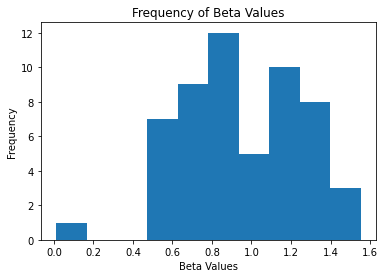

In [7]:
# Plot the histogram
plt.hist(stats_df['beta'])

# Title and Axes Labels
plt.title('Frequency of Beta Values')
plt.xlabel('Beta Values')
plt.ylabel('Frequency')

plt.show()

From the graph above, we can see that most of our beta values lie around the 1.0 mark, which makes sense because that's the average market movement; you'd expect most stocks to move roughly similarly to the market, as otherwise the market would not be moving in that direction. 

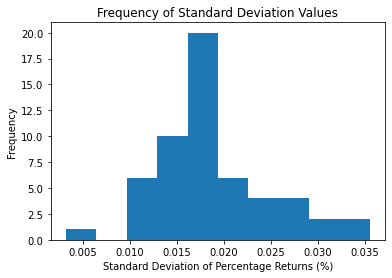

In [8]:
# Plot the histogram
plt.hist(stats_df['std'])

# Title and Axes Labels
plt.title('Frequency of Standard Deviation Values')
plt.xlabel('Standard Deviation of Percentage Returns (%)')
plt.ylabel('Frequency')

plt.show()

 In the graph above, you can see a histogram of the standard deviation of percentage returns on all of our stocks. We want to select the stocks with the smallest values, and avoid those on the upper end of the spectrum, since we want to avoid having too much risk in our portfolio. 

## Point System

Since we have two different measures for risk and stock volatility, we needed a way to combine them together a low beta didn't necessarily mean a low standard deviation, and the same for the other way around. We didn't necessarily want to prioritize one over the other by filtering our stocks by one statistic before filtering by the other, so we decided on a points system. We would sort all our stocks based on standard deviation, and again by beta, going from smallest to largest. Then, we gave points to each stock depending on where they ranked in our sorted list, giving the stock with the lowest standard deviation and lowest beta the highest number of points, and those with the highest values the lowest number of points. Then, we added those points together and resorted the series to get the final list of stocks from safest to riskiest, based purely on beta and standard deviation.

## Diversification


As we learned from Assignment 3, diversification reduces the overall risk of a portfolio. So, when we choose the stocks with the highest number of points based on standard deviation and beta, we also need to consider the industries that the stocks are from. Even if some stocks have low standard deviation and beta values, we must consider the industry that they are a part of. Thus, we have implemented a process that selects stocks based on standard deviation and beta values, while also taking into account the importance of diversification across industries. After a select number of stocks have been chosen from an industry, we no longer add the next stock from that same industry. Instead, we introduce stocks from other industries. This way, if any external event were to affect one particular industry more than the others, our portfolio would overall experience less fluctuations. By accounting for non-systematic risk, we are further ensuring that our final portfolio is safe. 

In [9]:
#Get a pandas series of the beta and sd, sorted in ascending order, then put that in a DataFrame
beta_df = pd.DataFrame(stats_df['beta'].sort_values(ascending=True))
std_df = pd.DataFrame(stats_df['std'].sort_values(ascending=True))

#Now we give each stock points in each category using a list
std_points = []
beta_points = []
for i in range (tickers_num):
    std_points.append(tickers_num - i) #So the stocks with the lowest std get the highest number of points
    beta_points.append(tickers_num - i) #So the stocks with the lowest beta get the highest number of points

#Add our lists to our DataFrames as new columns
beta_df['points'] = beta_points
std_df['points'] = std_points

#Store all the necessary points values we need, adding the points from beta and std together
total_points = pd.DataFrame(std_df['points'])
total_points.columns = ['std']
total_points['beta'] = pd.DataFrame(beta_df['points'])
total_points['total'] = total_points['std'] + total_points['beta']

#Now we isolate the total points and sort that series from highest to lowest before turning it back into a DataFrame
#Since we want to prioritize the stocks with the highest number of total points
final_points = pd.DataFrame(total_points['total'].sort_values(ascending=False))
final_points.reset_index(inplace=True)
final_points.columns = ['tickers', 'points']
#final_points

In [10]:
#----------------------------------------------------------------------------
#This block of code takes several minutes to run (with 50-something stocks)
#----------------------------------------------------------------------------
selected_tickers = []
sector_count = {}
sector_max = 5

for i in range (tickers_num):
    #We only want choose the maximum number of stocks we can (initiated in the very beginning of the code), not the
    # total number of stocks we have, so if we have enough stocks, do nothing
    if len(selected_tickers) < max_stocks: 
        temp = stocks_full_info[tickers_list[i]]
        sector = temp.info['sector']
        if sector in sector_count: #If there is a key in sector_count that matches the sector of our stock
            #If our current number of stocks is less than our maximum, then we add it, otherwise we just skip over it
            # and do nothing
            if sector_count[sector] < sector_max: 
                selected_tickers.append(final_points.tickers[i])
                sector_count[sector] += 1
        else: #So if there is no sector in our dictionary that matches that of the stock
            selected_tickers.append(final_points.tickers[i])
            sector_count[sector] = 1

selected_tickers

['MON',
 'BMY',
 'CL',
 'KO',
 'PG',
 'ABBV',
 'MRK',
 'PEP',
 'MO',
 'SO',
 'PM',
 'LMT',
 'CVS',
 'PFE',
 'ABT',
 'COST',
 'UNP',
 'UNH',
 'NEE',
 'CMCSA',
 'CSCO',
 'KMI',
 'ACN',
 'BK',
 'ORCL']

Here, we can see the number of stocks within each industry. As explained above, we can see that the stocks are spread across several industries, and not just bunched all in one. 

In [11]:
sector_count

{'Technology': 3,
 'Healthcare': 5,
 'Financial Services': 5,
 'Consumer Cyclical': 2,
 'Industrials': 3,
 'Consumer Defensive': 3,
 'Communication Services': 2,
 'Energy': 2}

In [12]:
selected_ticker_prices = pd.DataFrame()
selected_portfolio = pd.DataFrame()
selected_ticker_returns = pd.DataFrame()
selected_ticker_points = []
selected_ticker_weights = []
shares_per_stock = []
investment = 500000 #500,000

#Get the number of points associated with each of our chosen tickers
for i in range (len(selected_tickers)):
    selected_ticker_points.append(total_points.total[selected_tickers[i]])

#Calculate the weighting that should be given to each of our selected tickers, based on how their points compare to 
# that of the other chosen stocks
for i in range (len(selected_tickers)):
    selected_ticker_weights.append(selected_ticker_points[i] / sum(selected_ticker_points))
    selected_ticker_prices[selected_tickers[i]] = all_prices[selected_tickers[i]]
    selected_ticker_returns[selected_tickers[i]] = daily_returns[selected_tickers[i]]
    shares_per_stock.append((investment * selected_ticker_weights[i]) / selected_ticker_prices.iloc[0, i])
    selected_portfolio[selected_tickers[i]] = shares_per_stock[i] * selected_ticker_prices[selected_tickers[i]]

selected_portfolio['total'] = selected_portfolio.sum('columns')
selected_ticker_prices


,MON,BMY,CL,KO,PG,ABBV,MRK,PEP,MO,SO,...,COST,UNP,UNH,NEE,CMCSA,CSCO,KMI,ACN,BK,ORCL
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-16,9.785,58.655910,72.816872,48.974052,123.469925,102.991287,69.581032,128.622894,43.404179,57.139622,...,323.250336,205.282028,347.556396,72.760925,55.796642,47.165886,14.289574,257.676697,43.974262,64.960365
2021-03-17,9.680,58.921234,72.759285,48.993179,122.971985,97.601997,70.024918,128.248566,43.702671,56.626534,...,325.166626,205.863831,345.184448,70.425011,55.277512,46.928493,14.558847,258.410065,44.231030,64.348175
2021-03-18,9.770,59.063377,73.018456,48.352551,123.240097,96.421921,69.997749,127.202385,44.396221,56.346664,...,319.032532,208.831070,354.858337,68.658592,53.710514,46.339745,14.145960,260.971985,44.411716,64.853462
2021-03-19,9.750,59.413982,71.972176,48.582031,122.579384,96.096695,70.215141,129.093185,44.378662,55.693642,...,324.890015,204.409302,358.318268,68.378662,53.316357,46.510677,14.289574,257.930908,44.078869,64.387032
2021-03-22,9.700,60.058350,72.730476,48.763699,124.657318,98.401108,70.215141,132.260529,45.335590,55.684311,...,330.401825,200.016647,359.572845,69.199135,54.191189,47.764130,14.163912,259.319489,42.994728,64.445343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17,9.995,77.160004,75.290001,60.709999,140.869995,152.160004,102.309998,180.029999,43.669998,64.239998,...,521.320007,209.820007,515.309998,81.933891,34.259998,46.590000,18.299999,287.140015,43.880001,79.199997
2022-11-18,9.995,77.449997,76.459999,61.139999,142.570007,154.979996,104.230003,181.330002,44.200001,65.570000,...,523.669983,210.580002,530.000000,82.779594,34.500000,47.790001,18.420000,286.500000,44.560001,79.730003
2022-11-21,9.995,78.959999,76.919998,62.080002,144.380005,157.110001,105.610001,184.820007,44.799999,65.730003,...,523.369995,212.270004,517.190002,83.177574,34.349998,47.619999,18.280001,287.019989,44.650002,79.820000


In [13]:
#created to assist with the Monte Carlo calculations later on
selected_portfolio

,MON,BMY,CL,KO,PG,ABBV,MRK,PEP,MO,SO,...,UNP,UNH,NEE,CMCSA,CSCO,KMI,ACN,BK,ORCL,total
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-16,26777.020448,25559.883155,25316.455696,24099.318403,23855.890944,23855.890944,23855.890944,22638.753651,22395.326193,21421.616358,...,18257.059396,18257.059396,16796.494645,16309.639727,16066.212269,15579.357352,13145.082765,12901.655307,12414.800389,500000.000000
2021-03-17,26489.685248,25675.500510,25296.434369,24108.730429,23759.682869,22607.568737,24008.077410,22572.868544,22549.339829,21229.259832,...,18308.802846,18132.461488,16257.260473,16157.895206,15985.348801,15872.935886,13182.494693,12976.988528,12297.802591,498150.866824
2021-03-18,26735.974053,25737.440812,25386.540950,23793.487622,23811.485403,22334.227375,23998.762754,22388.731592,22907.192032,21124.337051,...,18572.698649,18640.628712,15849.491632,15699.853931,15784.802047,15422.780885,13313.188128,13030.000464,12394.369772,498221.007775
2021-03-19,26681.242048,25890.220354,25022.777741,23906.411287,23683.827579,22258.895256,24073.295697,22721.529002,22898.132059,20879.519134,...,18179.442185,18822.378079,15784.871170,15584.639734,15843.027226,15579.357352,13158.051071,12932.345956,12305.228593,497479.512039
2021-03-22,26544.414644,26171.009632,25286.418401,23995.806764,24085.309748,22792.666830,24073.295697,23279.009080,23391.879920,20876.021040,...,17788.774998,18888.280760,15974.273181,15840.357581,16269.993249,15442.353203,13228.887913,12614.268747,12316.372698,501328.501830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17,27351.693458,33623.221621,26176.295816,29874.382977,27217.796098,35244.849842,35077.032938,31686.853377,22532.481548,24083.543911,...,18660.651251,27069.118359,18914.027836,10014.370160,15870.047119,19951.765829,14648.120319,12873.999923,15136.185711,603675.609776
2022-11-18,27351.693458,33749.589014,26583.072517,30085.978990,27546.259129,35898.045126,35735.307870,31915.665277,22805.947867,24582.160950,...,18728.242481,27840.780886,19109.254161,10084.523860,16278.805835,20082.598001,14615.470702,13073.505931,15237.477071,610503.407351
2022-11-21,27351.693458,34407.587123,26743.001750,30548.538591,27895.972668,36391.418552,36208.440606,32529.936749,23115.530077,24642.146245,...,18878.545336,27167.874593,19201.125786,10040.677658,16220.897712,19929.962200,14641.997348,13099.911171,15254.676583,613999.258193


## Correlation 
We will calculate the correlation between two stocks, given by the following formula: 
\begin{align*}
COR(X,Y)=\frac{COV(X,Y)}{\sigma_X \times \sigma_Y}
\end{align*}

It describes the relationship between two two and how they move together. This calculation is expressed numerically as the correlation coefficient, which has a value between -1 and 1, where 1 represents a perfect positive correlation and -1 represents a perfect negative correlation. When two stocks are postively correlated, it implies that as one stock moves up or down, the other moves in the same direction. Conversely, when two stocks are negatively correlated, it implies that the two move in opposite directions. Zero correlation implies that there is no relationship between the stocks at all. 

Since we are creating a safe portfolio, we wish to reduce risk. Thus, we want to find a negative correlation between our stocks to help counteract any fluctuations within the protfolio. We take the list of stocks that have low standard deviations and betas, so that the overall portfolio is not affected by the volatility of these stocks. We then wish to find the most negatively correlated stocks in that list to discover which best complement the portfolio. Furthermore, the inclusion of negatively correlated stocks is used to account for non-systematic risks. If two stocks are very positively correlated, it is expected that the external event that affected one stock, is likely to affect the other. Therefore, to reduce risk, we include a small number of stocks that have a negative correlation with each other. 

Before we find the correlation, we want to extract the top 30 stocks that was filtered from the point system, earlier.

In [14]:
top_number_of_stocks = 30
top_stocks_returns = pd.DataFrame()
top_stocks_tickers = []

for i in range (top_number_of_stocks):
    top_stocks_tickers.append(final_points['tickers'])
    top_stocks_returns[top_stocks_tickers[i]] = daily_returns[top_stocks_tickers[i]]

top_stocks_returns

,MON,BMY,CL,KO,PG,ABBV,MRK,PEP,MO,SO,...,COP,SLB,SPG,AXP,GM,QCOM,COF,PYPL,BA,OXY
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-17,-0.010731,0.004523,-0.000791,0.000391,-0.004033,-0.052328,0.006379,-0.002910,0.006877,-0.008980,...,0.004419,0.008909,0.008960,0.009630,0.051296,0.002020,0.024593,0.008664,0.032836,0.030884
2021-03-18,0.009298,0.002412,0.003562,-0.013076,0.002180,-0.012091,-0.000388,-0.008157,0.015870,-0.004942,...,-0.060707,-0.037443,-0.012010,-0.014515,-0.012989,-0.031138,-0.025370,-0.051935,-0.028567,-0.083333
2021-03-19,-0.002047,0.005936,-0.014329,0.004746,-0.005361,-0.003373,0.003106,0.014865,-0.000396,-0.011589,...,-0.014612,-0.007339,-0.001113,-0.013115,0.009280,0.009788,-0.014652,0.012038,-0.000937,0.055597
2021-03-22,-0.005128,0.010845,0.010536,0.003739,0.016952,0.023980,0.000000,0.024535,0.021563,-0.000168,...,-0.006844,0.022181,-0.012340,-0.005401,-0.028753,0.023431,-0.009571,0.012869,-0.017942,-0.022776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17,0.000000,0.013263,-0.009472,0.003139,-0.006138,0.001910,0.023817,0.009533,0.002065,-0.013824,...,0.015088,-0.003019,0.001730,-0.012650,0.004419,0.017643,-0.022799,-0.016085,0.000521,-0.006534
2022-11-18,0.000000,0.003758,0.015540,0.007083,0.012068,0.018533,0.018767,0.007221,0.012137,0.020704,...,-0.019819,0.011546,0.018223,0.012347,0.029244,0.008058,-0.004827,-0.008407,0.006424,-0.002939
2022-11-21,0.000000,0.019496,0.006016,0.015375,0.012696,0.013744,0.013240,0.019247,0.013575,0.002440,...,-0.024108,-0.021894,-0.006107,0.002033,-0.006286,-0.029471,0.023747,-0.050518,-0.005463,-0.023298


Next, we are able to find the correlations between each of these stocks with a correlation matrix: 

In [15]:
corr_matrix = top_stocks_returns.corr()
corr_matrix

,MON,BMY,CL,KO,PG,ABBV,MRK,PEP,MO,SO,...,COP,SLB,SPG,AXP,GM,QCOM,COF,PYPL,BA,OXY
MON,1.000000,-0.002334,0.007484,0.055842,0.010209,0.077379,0.019718,0.058519,0.000686,-0.016197,...,-0.016257,0.000410,0.048758,-0.019170,0.009706,0.032551,-0.032546,0.044898,0.001075,-0.016900
BMY,-0.002334,1.000000,0.335093,0.316621,0.336315,0.495082,0.551217,0.343063,0.287716,0.283506,...,0.139439,0.097322,0.172781,0.178362,0.079622,0.059123,0.181512,0.106914,0.068364,0.052975
CL,0.007484,0.335093,1.000000,0.708749,0.751744,0.417119,0.300376,0.709080,0.352280,0.607770,...,0.028942,0.031149,0.195132,0.219264,0.158785,0.171487,0.205091,0.090612,0.068070,-0.037096
KO,0.055842,0.316621,0.708749,1.000000,0.706230,0.391741,0.302903,0.810738,0.400561,0.540915,...,0.211517,0.164263,0.367200,0.432110,0.297832,0.274820,0.380055,0.175442,0.238464,0.138702
PG,0.010209,0.336315,0.751744,0.706230,1.000000,0.386902,0.299662,0.734509,0.364540,0.548628,...,0.039945,0.016245,0.241107,0.281461,0.205649,0.225729,0.249498,0.154627,0.119234,-0.038462
ABBV,0.077379,0.495082,0.417119,0.391741,0.386902,1.000000,0.411676,0.406384,0.240757,0.342864,...,0.195910,0.158295,0.219377,0.247726,0.150121,0.136222,0.203314,0.114334,0.097370,0.122099
MRK,0.019718,0.551217,0.300376,0.302903,0.299662,0.411676,1.000000,0.300352,0.193901,0.254711,...,0.133115,0.142468,0.104101,0.123975,0.092482,0.035030,0.124997,0.074389,0.019600,0.105770
PEP,0.058519,0.343063,0.709080,0.810738,0.734509,0.406384,0.300352,1.000000,0.368448,0.553339,...,0.114690,0.093748,0.307915,0.319716,0.236844,0.290545,0.286359,0.190503,0.170557,0.025942
MO,0.000686,0.287716,0.352280,0.400561,0.364540,0.240757,0.193901,0.368448,1.000000,0.326919,...,0.324474,0.302493,0.285980,0.285723,0.254819,0.121364,0.325618,0.047406,0.212705,0.215203
SO,-0.016197,0.283506,0.607770,0.540915,0.548628,0.342864,0.254711,0.553339,0.326919,1.000000,...,0.185842,0.133292,0.239664,0.249125,0.137554,0.167501,0.224495,0.096939,0.123006,0.041213


As seen above, there are multiple repeating and redundant values. We wish to remove these values and ultimately sort through the entire matrix to find the lowest correlations. 

In [16]:
#returns the redundant pairs in the matrix, such as AAPL and AAPL or AAPL and ABBV with AABV and AAPL
def get_redundant_pairs(df):
    to_drop = set()
    cols = df.columns

    #itereate through the rows and the columns to drop any redundant pairs
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            to_drop.add((cols[i], cols[j]))

    return to_drop

def get_neg_correlations(df):
    #unstack to make it easier to read, outputting a series 
    sorted_corr = df.corr().unstack()
    #dropping the redundant pairs 
    to_drop = get_redundant_pairs(df)
    sorted_corr = sorted_corr.drop(labels=to_drop).sort_values(ascending=True)
    return sorted_corr

print("\nNegative Correlations")
neg_corr = pd.DataFrame(get_neg_correlations(top_stocks_returns)).reset_index()
neg_corr.rename(columns = {'level_0':'Ticker 1', 'level_1':'Ticker 2'}, inplace = True)
neg_corr


Negative Correlations


,Ticker 1,Ticker 2,0
0,MON,USB,-0.048533
1,PG,OXY,-0.038462
2,CL,OXY,-0.037096
3,MON,COF,-0.032546
4,MON,PM,-0.029213
...,...,...,...
1480,KO,PEP,0.810738
1481,MSFT,GOOG,0.814204
1482,JPM,C,0.818661
1483,BAC,C,0.830908


In [17]:
temp = neg_corr.copy()

#Function to remove any instances of a ticker from a DataFrame set up like neg_corr
def remove_instances(ticker1, df):
    #Loop through all rows of the DataFrame
    new_df = df.copy()
    index_to_drop = []
    for i in range (len(df.index)):
        if ticker1 == new_df.iloc[i, 0]:
            index_to_drop.append(i)
        elif ticker1 == new_df.iloc[i, 1]:
            index_to_drop.append(i)
        
    new_df.drop(labels=index_to_drop, axis=0, inplace=True)
    return new_df


In [18]:
#we only want three pairs of stocks from the correlation portfolio
corr_stocks_number = 3 
corr_tickers = []
#create a temporary dataframe
temp_df = neg_corr.copy()
temp_df.reset_index(drop=True, inplace=True)

#loop through the dataframe to extract the stocks with the smallest correlation 
#each time we extract a ticker, we remove all instances of it from the dataframe to ensure that
#there are no repeating tickers and that each pair of tickers offset each other
for i in range (corr_stocks_number):
    
    corr_tickers.append(temp_df.iloc[0, 0])
    tick1 = corr_tickers[2*i]
    
    corr_tickers.append(temp_df.iloc[0, 1])
    
    tick2 = corr_tickers[2*i + 1]
    temp_df = remove_instances(tick1, temp_df)
    temp_df.reset_index(drop=True, inplace=True)
    temp_df = remove_instances(tick2, temp_df)
    temp_df.reset_index(drop=True, inplace=True)

corr_tickers

['MON', 'USB', 'PG', 'OXY', 'NEE', 'SLB']

In [19]:
#to help with the Monte Carlo calculations later on
corr_prices = pd.DataFrame() 

for i in range (len(corr_tickers)):
    corr_prices[corr_tickers[i]] = all_prices[corr_tickers[i]]
corr_prices

,MON,USB,PG,OXY,NEE,SLB
Date,,,,,,
2021-03-16,9.785,50.686966,123.469925,27.963648,72.760925,27.394434
2021-03-17,9.680,51.298893,122.971985,28.827278,70.425011,27.638504
2021-03-18,9.770,52.974648,123.240097,26.425003,68.658592,26.603647
2021-03-19,9.750,51.976727,122.579384,27.894163,68.378662,26.408390
2021-03-22,9.700,51.063541,124.657318,27.258850,69.199135,26.994160
...,...,...,...,...,...,...
2022-11-17,9.995,42.770000,140.869995,71.459999,81.933891,52.830002
2022-11-18,9.995,43.380001,142.570007,71.250000,82.779594,53.439999
2022-11-21,9.995,43.389999,144.380005,69.589996,83.177574,52.270000


In [21]:
corr_prices = pd.DataFrame() 

for i in range (len(corr_tickers)):
    corr_prices[corr_tickers[i]] = all_prices[corr_tickers[i]]
corr_prices

,MON,USB,PG,OXY,NEE,SLB
Date,,,,,,
2021-03-16,9.785,50.686966,123.469925,27.963648,72.760925,27.394434
2021-03-17,9.680,51.298893,122.971985,28.827278,70.425011,27.638504
2021-03-18,9.770,52.974648,123.240097,26.425003,68.658592,26.603647
2021-03-19,9.750,51.976727,122.579384,27.894163,68.378662,26.408390
2021-03-22,9.700,51.063541,124.657318,27.258850,69.199135,26.994160
...,...,...,...,...,...,...
2022-11-17,9.995,42.770000,140.869995,71.459999,81.933891,52.830002
2022-11-18,9.995,43.380001,142.570007,71.250000,82.779594,53.439999
2022-11-21,9.995,43.389999,144.380005,69.589996,83.177574,52.270000


In [67]:
corr_portfolio = pd.DataFrame()
corr_ticker_cost = investment / (corr_stocks_number * 2)
corr_shares_per_stock = []

for i in range (len(corr_tickers)):
    corr_shares_per_stock.append(corr_ticker_cost / corr_prices.iloc[0, i])
    corr_portfolio[corr_tickers[i]] = corr_shares_per_stock[i] * corr_prices[corr_tickers[i]]

corr_portfolio['total'] = corr_portfolio.sum('columns')

corr_portfolio

,MON,USB,PG,OXY,NEE,SLB,total
Date,,,,,,,
2021-03-16,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,500000.000000
2021-03-17,82439.111362,84339.389198,82997.259546,85907.002965,80658.002444,84075.789670,500416.555185
2021-03-18,83205.591979,87094.460639,83178.216017,78748.080367,78634.917423,80927.775499,491789.041923
2021-03-19,83035.259343,85453.800541,82732.282054,83126.264764,78314.312517,80333.806949,492995.726167
2021-03-22,82609.435876,83952.452836,84134.738473,81232.994146,79254.002690,82115.706798,493299.330818
...,...,...,...,...,...,...,...
2022-11-17,85121.785398,70317.223344,95077.131267,212955.046397,93839.162259,160707.834174,718018.182839
2022-11-18,85121.785398,71320.112021,96224.517434,212329.236638,94807.748903,162563.432518,722366.832912
2022-11-21,85121.785398,71336.550043,97446.135816,207382.327019,95263.556438,159004.320930,715554.675643


In [101]:
# Monte Carlo Simulation
# Input: list with both weighted portfolio historical prices
def monte_carlo(portfolio_value):
    daily_returns = np.diff(portfolio_value)/100
    daily_volatility = portfolio_value.std()

    num_simulations =  2000
    df = pd.DataFrame()

    trading_days = 5
    price = portfolio_value[len(portfolio_value)-1]/2000
    price_list = []

    for i in range(num_simulations): 
        for i in range(trading_days):
            if i == trading_days-1:
                price_list.append(price/2)
                price=0
                break
            price = price/2000 * (1 + np.random.normal(0, daily_volatility))
            print(price)
        price = portfolio_value[len(portfolio_value)-1]/2000

    mean_simulated_price = round(np.mean(price_list),2)

    return mean_simulated_price

In [106]:
ranking_weight =[]
correlation_weight=[]
predicted_price=[]

count = 70
while count <= 95:
    ranking_weight.append(count/100)
    correlation_weight.append((100-count)/100)
    
    ranking_weighted_value = [x * count/100 for x in selected_portfolio['total']]
    correlation_weighted_value = [x * ((100-count)/100) for x in corr_portfolio['total']]

    predicted_price.append(monte_carlo(np.add(ranking_weighted_value, correlation_weighted_value)))

    count += 5
# Create a dataframe to store Monte Carlo values
monte_carlo_df = pd.DataFrame()

# Convert python lists to numpy arrays
ranking_weight_array = np.array(ranking_weight) 
correlation_weight_array = np.array(correlation_weight)
predicted_price_array = np.array(predicted_price)

# Populating the dataframe storing sharpe ratio values and weightings
monte_carlo_df['Correlation Stocks Percentage'] = ranking_weight_array*100
monte_carlo_df['SD/Beta Stocks Percentage'] = correlation_weight_array*100
monte_carlo_df['Monte Carlo Prediction'] = predicted_price_array

monte_carlo_df

-9160.266369003808
-163746.48237251778
-442941.5982117687
4769773.325304793
5185.741786616123
99368.94880328089
-151709.1135530934
-609616.9986950634
-3072.6554342909617
-10305.713405251485
-189183.68526745733
4141745.0370079624
-3215.2576422905186
-2143.667288232437
-49975.489080674844
-1521625.2259884987
5189.678692077956
-7390.8197604511
-5787.000389112069
32410.56323644188
1077.4168309083095
-22806.914669081245
307294.6905059166
333364.1644125158
6831.003858985916
-31156.564307391844
-107694.84830033945
1094655.9106928303
2973.6213130410274
15991.753363217724
79253.43096124879
-1024751.205635179
-756.8494880008296
10813.768030539426
58317.463894884044
2180958.547560197
4169.068308685232
-36428.801096406336
-176464.73426219972
-1631059.7234711582
728.4262116587291
-20635.550571610238
-890026.3545845223
17918965.453335892
7082.650834415926
158354.8705367701
1454766.1123431867
-12376388.30058284
-9972.634308940953
285279.03068207606
5523554.255687571
-59390149.12669194
151.91252885116

-581552.0927259655
-6007370.806740558
-4504.151869186652
16053.252327549013
43135.86704872318
-123959.75917593084
11140.248592972835
33366.67318971119
849621.0715594563
-403277.2174328237
-9969.242624066965
150853.23454474242
-5473184.981998683
72740371.69934295
663.2515138532433
19118.152680024174
183810.9813240449
-6544287.212861203
1757.9142075063262
6716.3036855126265
129121.16919033125
2353617.816038884
10067.23165831576
116630.61645030281
-1784939.9373197898
6838383.390793923
10366.778050126471
82880.32789167402
-1251489.060024907
-4209111.639082477
3347.7755733128083
-48984.57169838406
483813.9183774116
-10139416.612698602
-6066.439118262675
86179.74151755817
-456342.17583858874
-16025516.829658648
840.398774613642
-13147.383954528244
355648.58366791107
-8624559.000667317
-7341.063487947672
-124212.12022765134
2266846.7184884856
-43729607.44676002
-8820.9697870427
84092.31682703237
-1272796.200134696
23906665.451086186
-12038.732526946727
-340246.66404537903
7202923.160740094
-4

-1538826.1885369134
-32784757.863838796
13149.290267801964
382001.16651859006
13209319.200538225
108726485.28167386
-3242.223845798186
59915.38391211695
-58493.78509308415
-161108.5077052889
10792.090492754187
-106523.62541760599
-920542.1695392409
-28577076.144560542
-4472.660623696119
-197197.1293933854
-425097.6452631631
-1237005.2747782245
-2578.539143268273
32408.9965835864
503014.0315538975
-3977499.1988631245
5913.931306737623
77749.10540144736
1263749.8449599037
20688664.135787718
2123.6257651704436
-20330.39843650435
-759931.0350323436
722578.7266091085
-3484.3493044676484
5939.645329628532
-97554.48771118918
1937657.3964134243
9296.182932358994
-198186.6124907922
-1048681.3277642906
-46820683.84585917
-4334.7421145002845
40275.75036006547
931381.6678521567
-5007761.474731685
-8255.628706061625
17523.30549035685
-160742.45020909718
286100.94371883536
-735.3715594879238
-32363.05234121942
370748.48579512
-9900288.016834857
9107.696382261835
-300431.1908046749
3124651.9470742918

305534.99808851234
-4714741.0259539755
-17137571.180420235
-15361.959525735809
686356.4333717403
12391551.880661173
65526322.56428809
5321.369697062748
59714.12602671966
1268594.3001369834
-94878.0425705621
-8487.3474243046
176730.6178480006
578609.1795422568
5292506.980455383
-1044.0828755421253
6928.036838041008
-187305.78865837958
3027925.896938021
12955.399516920797
-248605.06768090505
-539424.4467430707
-12774901.317818444
3499.366969172971
34233.74423846276
981411.8403207661
26037782.412604246
-11209.68495483194
-254068.89117522605
-2413936.821701459
-58295915.79195549
-6470.130903826188
-19951.31656227587
12804.903550802748
20887.841252106024
14266.70238025946
103780.96410358006
-2158279.973664714
10526015.526073836
4788.247987879545
-66767.02031758921
-1967126.8151656322
76637011.6151609
1079.9953606181289
16832.541224077373
-93794.02281202444
-549690.2711791514
-8298.721366847578
-44797.1012309594
1328367.0390985084
7949745.906861086
-8052.55576669335
163749.95410502897
558217

-1213078.216167326
2669.5473252600605
78855.95325488354
-1537205.3958168663
29540526.60599489
-958.6902975612225
35222.66219889686
210431.8333302213
-3134549.470811725
-992.2916492189279
-45686.04724733815
154829.7552614948
-2591014.6231404026
6287.435983388517
-53669.5417418357
1009054.8145820828
-1014663.5430999271
-18497.618725754608
-504898.3050737989
-7523462.090004799
47518199.46072222
-923.8231958150004
2129.093170313772
19607.642657310073
-66515.9482119432
698.9702073505226
12799.685312242593
176393.8433867373
-6889472.712835543
-5607.654598332522
-86395.25501828176
-769548.6171685047
-14530478.446916861
6441.658249447873
20195.692656582567
-300001.6449172732
7906395.589451422
-6997.900764698217
-29934.820410176984
745241.5453189429
-12740470.529298397
4481.373903458633
74787.85982100318
-592157.9426819151
-5131883.904515952
-5439.972383436706
-28776.00752776015
-322458.43144948705
463648.94977937604
-4299.262218413033
69154.28377310156
2926660.1327388478
1782499.8671896325
-11

3406.5213331452
85166.03905836704
2244684.7950324
87752133.52978334
3990.505282571584
-154416.419199557
-25958.91011205658
-494165.94839826314
-6777.936111442078
38662.66193139482
-850529.805006127
25310898.05117376
-5116.769233133611
-6000.620580020382
-3141.023881721442
-13092.20381020657
-10065.778305585503
-56628.046169197354
-170855.72860306827
-2061129.964656568
-4614.257850426684
79277.38594203936
-352884.5916705275
5569230.451365335
-761.9663876608939
-5097.338973785612
105430.60531135836
1317260.1363683743
-628.5035220761496
5581.3554478898
-103378.35137622434
191769.38356255073
3349.109216754574
-78218.9437276902
4523965.9229188785
173091902.55580947
-12794.79119161063
-354374.78661157785
-8000161.839968052
5597075.997902882
-7390.507875562889
-252098.04305271106
-1252856.7192818786
28250554.637314975
-19294.72938478203
122459.68422209409
-731067.8603441758
23140150.335452296
3104.6427936373334
-44920.358465043326
-680338.1937622953
-9172977.365302647
-6951.619824620016
-1101

-976.9856744319057
-23961.215651644503
72833.87567743471
1980467.8309064554
4827.779081688885
-128071.87699351247
5301944.057564181
104295418.9608843
-642.4688937697671
-3685.1717239759987
-12313.202442812679
310290.1590232888
-215.7453096727418
-1221.3472085094531
47097.01408882261
-845919.0787423291
5758.363566283215
27394.94441777352
-133556.67593072678
2128493.529824262
1468.8048063946637
-21623.450319490275
154892.96501096708
4179165.6466588383
1828.2568016059727
-78315.32466563246
1891186.5514549077
7595933.314620333
-3183.80892557323
56439.86481451264
690637.6417092058
18603739.226078033
37.969949805014764
-833.4587268182811
22380.611526809742
996989.0503252022
-18158.716631384443
-138300.81220595422
-3815792.5607191734
-68145269.83358322
6346.778134494734
128453.4356604549
-4009674.4623366226
-11925671.19016825
-12530.911687497433
24246.493977956034
14953.649829038382
-719770.3202128225
534.2700829972076
-8614.336861652653
174773.43515823557
-1036994.866324397
-3860.65275786032

-563951.3792330464
132.89751136554221
1917.1819112652317
-44603.24125482111
-484776.80823249597
-4809.161770790999
-68150.52780439127
-904057.9032040992
-1371212.4477772838
4231.483969495406
-56262.29852405024
-2230214.6268536774
-39842190.76328788
-10.585725242786028
200.55965570436723
-4706.961760435014
80489.43520246232
-10545.249859762462
-335563.0901096806
-10689693.270014197
122828994.64665665
-6466.505269469742
69294.39978129916
-1751805.4039385172
35921720.53596995
105.84169882169058
227.74259597595636
-5051.640148794667
74621.61128615079
-1542.7294415027334
14431.486032133242
-41779.326407572145
-310950.6075199279
-1431.8199737933717
-8048.068587151049
-97597.40967703746
2201278.9600029564
-3694.4143361581373
-27428.51514878603
866726.1838063693
19665777.169875808
-5830.443701354205
-71465.44666051873
-859734.4600040048
13094430.312137237
1757.2697886383428
-27333.995938465996
-670756.806422398
20530017.739481393
-312.2194070009072
437.58777834471505
-3268.7621352088286
-15513

-28310276.809314057
3520.5500545938125
-153452.95015419653
249557.55567790187
2252447.2616213723
3136.2120926637285
-145999.55734952417
1484625.9245219827
42233000.777242586
-5534.821562909406
64284.516179360275
562595.2206104627
-6648146.93535644
2423.1183909069055
43058.32234763106
787587.5810957943
-33182342.856054857
-4754.026881600974
-30290.664336617407
-117729.3752163963
-3736912.2493485757
1126.3530316047538
-25343.429561708643
-542272.9118744216
1747202.2454301687
-3984.6777276347543
-5005.057528696063
192542.4159728621
-1281299.93874357
9660.59858175479
166513.86726799997
1175128.7986124395
-13505810.966063453
5296.741180742945
88996.56711909552
158174.84969416246
-451930.59266300814
-4774.066576330509
73546.46159228441
648555.8483410174
-5249873.147770665
-2977.0074516398995
-57419.747414580735
-722009.3054468265
-5339772.792831418
2185.3788827200888
-32985.23780413254
-53690.38614523944
1072147.3646606728
-12571.202912319019
-227940.6931979257
5294804.344071799
-16632419.93

525747.0748995012
-3948572.173108555
-2732.121709972882
-84274.08569960133
1310558.4695926546
-819916.0086420819
2514.1860837759014
-895.6447444385077
21439.23066631095
288675.08070334507
-1849.7987550676633
-30108.862644911616
729103.3161489742
-18014047.73864774
10459.579566732948
-89195.52040400483
46828.01737121554
-500243.4700432003
-932.9268131049539
-25964.62179970236
696728.5756524472
-2577413.463240675
-3624.3397302294284
-8570.625084906314
-14036.167321881334
-289097.1780031243
-19830.97729477515
-454465.64547061094
1025139.9764659571
13607293.031153526
2501.7110923339715
-30970.252120471756
476516.2255631597
-10443676.202236205
15780.09375866035
-314464.8817202644
-1341264.756093488
-32107295.337594215
5957.223583327515
199030.4493250579
-5934064.708692452
-349901682.5285513
-2539.8347370001466
-2733.0894350214826
64278.46837421571
360801.34227292583
4061.4872780871774
13076.160544595672
392096.2679260734
3185808.764046479
-3138.982124182866
-43102.544463407925
210924.152885

-14766.533141608339
399700.84953263646
3186565.4503591214
65193077.79096638
8297.840608827148
-36259.92195018671
87335.4263738604
2435042.536161611
4529.36093837573
-109510.8157416335
-3858774.300410173
90221594.95303968
-3517.6071270183743
20306.37674433057
-259156.31653686002
-6645521.317625512
-3475.7861646228866
-1853.2485057638132
9217.456928444923
241900.09599342124
1108.3170252107225
8917.864723046909
226660.55377758128
-6205240.459034238
5177.535665396624
-94795.76096836341
3032238.7225142
-97778567.31348579
5445.2267320344345
57460.875488049074
2355260.227416677
-67302137.91834897
-8308.72420725238
-14338.189078995054
368691.9749554298
-2263949.8356207474
-1479.5424595547302
-20381.529014740703
-160277.29629515516
-519154.89894972416
-9770.14048867456
194136.36554592277
7505056.660903532
9447770.043547245
-8625.46644214073
-288849.30427261326
-806706.8322586656
-15345116.675181856
-5340.68381131831
134264.15177480615
4796154.801043978
50634032.450508066
6121.397054651237
-1343

135664.34838339867
-733357.1159410353
-24956516.565152764
3888.140140684385
101596.5228887272
710512.314961431
11263346.040038519
5897.79007807999
-156867.31616076702
-2388363.123208335
16007585.472794358
2875.725356774732
-55072.582089224285
-533595.9747353324
-4399365.181362065
5716.865232225892
93525.00322231658
603697.0740690165
21155357.127971217
-1837.8235083849659
-30622.7369096924
184528.5250406718
-3216328.922517878
3250.5324793188806
-8405.60539491031
-4458.482993593501
14779.081706778825
8898.961514786217
46169.707172358336
-463086.12829334225
-10466451.697003093
-3308.463180054908
-37817.86424777281
340462.75427173136
3601143.2803629893
-5602.72272978573
-174775.5044451184
2926887.2989396066
-1317303.4046690045
8139.598481443339
-24425.010854169966
108934.88869726693
-279623.2601934824
-1330.3636922962903
15776.890474745844
38845.74351419793
1002647.8852450437
-5383.260915940402
-34732.86958029986
235755.73927917928
3725725.868669095
2693.191429990213
13202.959847208334
535

150530.63974983568
1435249.1477647922
53676748.78470491
10797.502432693214
-18455.063870941693
39131.22143474797
-1616683.026887298
2085.1869275489244
35619.67942524443
1562628.624949771
16484810.72411609
-2132.742751596879
29596.04184770552
209927.7399879431
-3967709.256877915
5046.573528449393
34493.825398091634
363197.4548729601
-5271616.872320637
-9280.642010179366
12002.195179896185
299132.82780191075
2629088.8690894977
-3273.1216191537856
30553.16326190759
-604543.642491941
-14550787.025379092
-3895.9025803717986
13447.834408883553
-54923.02789688017
369203.033158224
18339.873134637113
-159741.9768281677
2501387.3902704576
-6130609.069213637
-5362.014982785751
-158457.76222940313
-3626581.018986312
-12714140.79407893
-4772.230619176722
108974.21657377885
335944.64877324295
-13865893.318858152
268.75463575197034
-4138.339941627423
13019.048517339537
-10610.150889779263
10409.897823578538
-58480.20944837199
540081.9453098637
9477291.479260104
-6021.6388494655275
-318815.8295276692


4371.016767945159
-71087.08705519834
280525.10793091165
5223720.572973864
-3433.469010850177
136918.7857373886
-2235247.491092156
3556162.0759292324
-6772.318959080451
-46548.381825163495
249103.93391472416
-1591249.8686096421
-5157.373121404926
-28557.565799642547
292009.5857118947
1104609.3120684556
1616.8276859891218
-4805.168544793691
-27804.73692452541
93980.31662340557
-4704.763207381882
-115570.86661525717
-2082928.132932871
-68149873.63746335
-7773.655548460975
130336.49558620618
438721.3347857673
4185364.9080898296
-1058.278884733092
-8682.024048217389
-223002.8114183707
-1359822.5639951602
3072.004904394152
64049.997819746495
189943.35043784892
688409.0804855623
3390.0346476449627
6208.680230039626
233753.93382371456
1153695.1855529172
12319.965840058589
-103271.23747901176
3297529.5628182627
-11432650.014018776
-2654.217075827287
46614.669976273784
-387981.8171127392
13582678.231305944
1731.5012844351318
-8711.672681344098
-108854.41237051012
351065.40584697627
7168.64775953

-269890.1930901557
5967090.136525446
12923.777805893116
223327.11682771237
-1192197.7637947605
21970389.274562247
1412.804975512149
16154.445104920136
-18275.11090378832
88718.22819840864
-600.9496739682041
14324.971788902527
542730.9392128563
5724488.639739859
-1813.8762969782035
-3389.1199812187047
105722.9051102793
-649620.9065187882
2097.0001263756917
11172.251298391697
-275131.19756163267
-644879.179745047
-1690.3881847913608
-55765.53422593281
-771578.1050367544
-10478376.848817255
-5811.78628837101
-86486.84836195639
-478915.93352959614
-5882435.40009539
-3207.9203447010295
-13949.154460563685
264786.42601514095
-2719808.088416751
-5794.705294126664
124166.16699298238
-1634449.715777695
-75737146.31256059
5135.838845376718
54692.22576698529
-343682.0378945352
7023471.528362874
9018.839554512597
5544.2844019165395
-140154.0117051458
988436.7171085037
-48.869127543880836
22.71414833102149
246.09457608284328
2212.3957322559086
10235.377375796192
99416.66233163708
2160628.63515019
-

3136650.1294254526
751.1144775654501
2790.026934163058
25467.33671741666
140676.12506826883
-6469.798918784862
25570.784262038644
229524.4296147892
3391255.8507275153
-19808.092681679744
39735.579909996224
-27767.3695043289
136740.37543437866
-1904.06080240844
-5305.327533554003
-38801.15715733527
-1079297.3511148107
6359.337944607977
-34788.99887342469
225508.57048056056
-2224785.8082113005
2383.489420341717
58277.86618549912
-2349042.4218120105
18890661.30199797
12412.388517227746
70447.48295549498
1237503.966587713
16358571.910943715
2919.508235561032
5966.291623231711
-262388.1691922979
5256065.380665633
4032.241093041383
56005.91012578359
483950.25708774925
1756074.2886471308
1977.3838114785294
-10806.539958585863
-196340.28742028258
-4525714.29296536
-7291.835626675052
55450.076303360656
-783221.3217658672
-16776062.56825865
-8237.917328677857
4639.969644672848
-19204.2361075485
-252956.91720869005
-1824.7307147130325
-3883.894152583341
1231.899965770506
-24892.456653189092
-4280

12086.144732755605
-42147.518175516125
-1297611.3069565
-407.60026634956307
6416.535127270961
36269.35579310034
-581524.3265594653
-5690.824027506232
-65057.83711151853
-476226.2581030966
4531577.296260761
-8053.102795904232
142311.83996147735
-1438171.4392832068
24648462.29576482
-1143.0789222698804
8972.50305672846
-209100.70522634572
2461760.2961856383
2507.0140041079703
28503.996977222658
-227293.47470538653
-408192.74063310126
1827.1004719769437
20483.519930122613
-575852.3966028091
8898866.942760982
7317.461762864135
-37332.11611375803
175517.6393827244
1035961.1033563453
-2877.786908538947
-15998.505938898956
-168228.31223575576
-2545553.5946658393
7226.42264775182
-217747.12556484417
-838566.5370476244
16570807.139031539
5163.081665155921
-59002.760434200136
-77632.67959586649
1509174.8773525413
-6787.767173061428
-52734.569691389624
252110.8295512841
-1438397.5825319833
375.8930075746887
-12903.896577024734
-159580.59122793452
-4890183.665963041
5189.850482527495
193226.465522

-66428.67856678339
-1643543.4140558778
-7446.759384090862
117151.6867905185
-2149885.120074924
8905578.396607365
-1847.6072470777028
-40983.54516604361
1636650.0875391003
17329476.512191936
-5002.858042968579
22234.413086014247
186995.3577115119
-2955073.5624473155
-1111.5133355057776
-11545.588832906253
114424.4952394769
2905217.3206392797
-1068.0093381636955
2908.335294557377
79125.6032393399
-998772.8213676214
-6777.517317059747
-142047.9812835273
-815304.7535825353
4415910.546759794
-90.10655826927123
-1724.0182655420813
-46027.026678575116
-942021.3843744905
-2201.2364326829243
34870.92925504624
-515843.0948463547
10376898.351836521
-3832.645353802104
97235.5504293325
-1082072.7469431353
21927649.570593033
15968.697338380434
601705.7800611836
-17120258.978408538
-229082062.13549867
285.13266107294515
3579.1171287228376
31371.57822422395
-830037.9992957687
6772.285190479556
-235481.89728638672
679672.5581154515
359684.23789589695
3831.4984653428464
43016.07926068362
663395.31003828

294556.9471680914
-175577.25887560312
5764.633649489411
36140.94032066108
192040.19660918228
1623368.5348534333
3122.0621990889153
73854.6543035223
1912918.4317795332
8701026.076647025
4111.91762212503
-39373.05996239239
529666.4556994828
-13734919.440018428
-10416.579326011115
-10007.662657698549
-648.6105637558711
87.30408396409105
6871.212573085509
-147817.206154809
4100452.621731263
-14903490.29020749
-7944.006739611963
-109473.96841034527
-3895892.4981244355
-69040715.89160569
-7518.584898342058
-91660.2577778498
792188.1698676856
10300580.672763048
8278.556601013419
288885.8452440526
3200677.2582547334
167113416.07082957
-318.8296295859356
-2223.338305668737
-37739.78066538346
-173376.38593044804
2083.996738934224
46284.425711385324
1015593.0719667341
6792548.907757495
2247.553578071033
37536.18669027933
56509.32124972702
-177097.9027776342
7027.500426098721
-3309.582451157953
65979.6724601626
-563594.1139834983
-2533.817154696317
-57224.07478116704
17479.837621036386
439244.2158

-375.56458327596965
5813.015921343811
-70831.76127381255
3649.9170099736293
-2941.863517287067
-4371.888667587778
-13916.118250796633
-6511.567919652104
-9036.679313444876
40249.075708225944
533084.6106755456
2281.2482919565346
54046.15671125671
1200414.1892497384
24110572.79734172
-4936.3680035818925
127934.17352943322
2910262.178136373
-21110989.466082938
1418.2009143188027
34041.55306459535
109622.13063986461
3312077.0257397406
595.6616073973554
7793.917919714218
102507.42267285976
2049463.0966094262
1938.8256210183663
-24465.27261190638
-579446.1059781378
-9500107.897761654
-2394.3533970884114
-68159.92215406588
1693420.2390420414
4199163.633497752
1066.9172189007425
-31715.494637823667
-481833.86734590825
8821199.800926585
4445.021843834569
87504.96334672582
1454291.5954243166
-6132973.674750787
-3437.9489215690314
-28621.47510271798
603786.1356860703
9687940.383232908
-4266.7882250162575
104302.86864103228
684385.494875288
14335084.203594508
2871.2640509253465
17036.79684464304
1

-3115.789821192227
69813.13376962913
196314.30070076787
7377029.686105429
7057.266942496135
-1718.6398289564631
-38246.9992993222
-504955.6854520527
-890.2780139132155
-344.17396137778144
-8690.254731245926
35835.91800583708
-3024.701518922663
-75339.99549930396
-11021.466999285587
112122.66739023627
1204.7029284305574
26124.013130316765
1364850.2972222606
-37433669.21045749
-10238.159084663506
-212502.4519774384
-2982833.7768418845
-153796943.2448859
-2974.876515383259
79130.69192424398
-1796547.356245692
9659862.12396917
-3248.6505264414673
-72072.47764897544
64802.8494803332
-882300.896423616
-295.0871608078751
3962.7629316409607
105540.00530347934
-3245467.46600401
-8785.235325689677
1137.0248847098055
15760.201724711962
440121.30105886306
-12313.816585022638
263244.3048098371
1727293.0095018211
31490190.747659948
9975.767069537369
43728.84264460787
-186495.35552421954
2562609.7044200143
-1656.013732331569
-18674.833326118805
-566220.3113798071
7141266.92787722
700.4333899645125
-7

2981.502384641573
18301.969223018157
-62579.2946281698
-624175.8839108405
1996.219396393596
-30443.528329892386
197165.5383399515
8351096.193025113
119.66152026690511
588.6656703747649
-17352.345625277278
486662.30454405566
-1756.0003319083607
18479.940022033385
118838.69708031621
1334986.01891064
-3491.5617949787293
-137837.54511363697
-1640744.7496299008
44422794.780304685
-1796.3212133886288
341.5238090388356
-5429.297891245878
-4010.8147314259104
2797.7583228808794
62389.569208037654
-650089.3629081965
-8889792.180928657
633.5925427444126
6424.906837264599
-278310.8688848154
2748153.348419938
-993.4166596909874
27793.015943218386
-1440901.6625442416
-1438597.343189773
952.7123831262
-12563.478664113109
146978.75753195595
778095.4774488204
3828.7704439264353
-21306.387029349822
-136404.93057886043
1422385.4857494845
-2965.53743809239
89794.16500814167
663701.9065681659
-23480515.455428716
2787.6608475600115
-37079.35679371586
468641.0889732844
-3525359.8204115187
967.980044889756
13

-4307.477486581377
-136026.3456354597
-840379.6409515358
11168880.332015207
2330.8137239961275
25363.864667833524
763993.6886449312
3008180.997235847
-7127.395890185539
225191.3116878567
-2535062.0672974577
-104302537.43778037
-6734.476454129967
63465.33845481581
-321561.4710469284
-5482325.013111151
-4147.381053208152
-134204.1284275962
603828.5333901618
-3494395.5687686414
-5470.031777772688
-67490.72146508891
323886.78369938955
2051826.6807724154
-2101.399072379518
42639.347934259116
721946.5723798069
624796.9428815112
1275.1967322769453
3578.861800163601
-956.4547647854556
40590.31520051123
1652.1703128722181
-34726.46502158603
982951.4884267178
-27126298.15329663
-848.3850809303915
1894.582824174623
-27909.16161757366
263136.9232735944
-4939.891844332182
47716.67725277557
-189599.62878255267
1754919.319542905
594.304566775606
-9502.568572916121
223567.5481406913
5557897.989443776
5916.676422981645
-65977.64579573479
17486.803374436397
-176331.5391686125
-5978.02303365269
-104256.3

51301553.52520942
-4524.859340458765
-94962.11433532894
982857.8694942899
6076374.0610841485
3153.215977414378
-37046.78421688969
1395275.735487767
-15959942.622823589
-884.4180289248025
5025.583176721432
108451.00693219247
-1279170.159211029
6276.638911995592
-107742.37658598578
-1534581.0994157642
2901110.458878359
2325.5010926999357
10775.28928937052
406823.7450985598
-4604434.546779718
2042.8985342940805
-17372.130462944922
72679.28202794243
-1304331.6374195125
10637.418114631642
95273.65882071517
1771276.0640234721
47177955.80894183
-6277.296698775598
-104249.4637766803
1221971.425337622
-7849798.310751213
-5533.507984178689
-32817.18988147472
170201.6935738003
2870194.0400336753
8541.008582841916
-339696.3974957336
7690479.938967567
-305652323.09038466
918.8836848803343
9609.264893054024
160229.98312271188
-290747.54969461827
7623.408308733336
-362523.5944564061
-251902.78193160577
2021143.7227457177
4999.791996507533
-29697.360015998445
-899159.477348848
-28294127.408745725
-340

-3363211.181254047
-11147616.817430161
-8292.456964293155
18501.127221417402
43692.76430369326
341183.51253771107
-10373.299394971973
-23072.00373975912
-5585.2714855401355
96717.2922415374
1632.0750779166772
35107.59528450959
196528.58747420812
-2845639.290549168
-1376.9072512625862
904.5666662727488
2535.90257553893
-53318.989050596785
-13241.389743739446
226702.51455636148
-373918.67837034515
4705015.443418774
838.8035983973583
-12133.313807106335
-123681.9864869666
-1447998.9402652637
-9702.893816562735
-44608.233172192486
353149.2335010634
-7989091.014726984
-1513.11665374051
-1270.6134101158996
23592.49538739532
692639.9058692387
5724.17133104483
4837.190546619931
47381.43094552049
-54683.38289609446
897.6731846624078
12450.245447880152
-4485.90792453608
242889.47262207986
-11102.751582707997
135415.78766996585
-1826407.4037155895
7690865.596441722
-3018.8249692578174
-75746.87439375317
919055.9199832357
5195209.658740733
6199.449608719149
63237.20562352178
586601.601912305
-3947

8510341.408715604
-93192620.52344646
-3765.16491516293
44702.5666158972
85879.06729311291
1111836.4656962503
-2489.0353512821994
-31422.061886008007
-986659.5657467941
11955704.364054745
6309.4261689625
-90723.21394739344
-3491291.4303172226
-130280340.53201506
2327.7012339486764
-50511.95785282152
-602269.4210666539
-9296697.705709359
7433.372434316829
-144112.76897217086
-1783069.4402115676
32958445.218867045
3179.0376007163436
-26814.502644786877
1189054.0210925832
2130324.289421475
-8189.559226858708
114842.97737216906
275002.8660230805
1769912.237555303
6507.885476014846
41875.58570069587
1145708.8969683803
15024939.261496821
3148.9698712449854
-18305.99482732691
285605.59378362464
-708421.2244237403
-2306.9318880126125
33016.13652738573
546302.0319365234
13476813.195470123
12465.632665297937
-215720.5383885554
85260.84689989526
1536556.40929286
-5206.495657692016
46873.51153887452
-1157178.1744458217
-22792579.640826102
-7507.044291498594
-28367.606810881072
-675054.2069441027
-8

-61239.26518679301
-1001324.5780412147
-13629036.177545695
-6406.536248346304
150232.23778396496
-2170229.174382036
-45945390.20365548
-6888.944964703759
-108746.44395658592
-856957.730756994
-21567155.044154614
-2401.0402426133683
-19519.066406942497
255018.98424030267
-3957630.7999467757
847.0583926973743
19816.21517537547
-457345.1062385479
-6312878.170067997
2521.473223556959
-30294.972176759384
418695.9957305547
-1541070.5578615258
5988.489948287917
-63793.68119052065
-153120.3632989629
-1261629.928625401
11171.140169829507
50527.03538796469
-369426.2570180376
9097432.231842192
3623.5510012495583
72022.77310592576
912922.0199901962
-19511053.981454927
-3544.656107152533
25905.06752356318
612733.4581618236
2351675.7096341285
-4549.047451755629
-136298.98909313252
964985.615498952
9084865.462204434
-9177.302783952133
-111737.15005216711
-975854.5455907284
9130291.020305559
-2425.031302929808
55799.774957245725
-937835.481560483
9315116.13404393
-1161.3509124723487
-29646.61430064843

413.1096161566382
-8369.661499774194
260149.0060068209
5764346.696064628
4724.53098839495
-139100.50853316026
687218.7558767862
-4797313.755999686
4980.153258313383
166177.51651083212
-4251546.95640319
-102132159.84457116
-9041.810756705323
3416.0131905104936
128769.64938069985
-3272552.2992344997
6017.281695832853
133499.85474810787
3249263.4492356665
-100979036.33179039
9828.061709807278
-66919.6219651011
-1697176.30573425
-25181198.153564308
-12361.987757158235
-79606.84352444836
386824.198906215
-1353842.1261132103
-6076.76716672861
-78830.89281986776
-364839.22884969646
353350.7457358583
12949.177215502737
-24276.920815798396
136858.80915839883
-2430522.1121985083
-3271.6116612760934
97122.74788462646
-1803638.0795621697
-3737346.3781656525
-6718.50916093284
267175.87812601984
2877615.5373933073
-3734150.5528845377
-1823.5176822324881
11333.223759216253
120575.53226357853
-93258.74083176296
-280.8948481014559
-3423.3207014614095
24633.762737385874
-19226.41244574994
-90.3555822909

-11724.35529014545
89519.6337118282
1253745.7549480922
17.343023713261392
-87.36235538136378
-376.96521685128477
10598.386502623345
-5752.047576586132
34640.526108475264
81357.20835185127
-178338.19454641335
9411.782139999359
111165.30656379703
-303008.1462425383
-8824425.984733762
226.66731856499578
-1551.6266889553533
-17848.08547765312
49845.2887755901
-595.5680697241356
-2013.8986161879466
27296.611122596467
32386.503193063672
-1401.527251632101
41945.68717184177
-47721.86513194492
-820331.6287574001
1000.8033633822488
-4458.995095422946
52599.04012691282
-1763393.6251599218
-4836.230396576477
10044.769906313328
148460.55077598858
-2549388.3804509
1867.1022488972342
5451.46879506968
-1830.2275153491298
-8230.21880462405
6659.586653049433
103622.30085524138
-643085.526947092
-11385837.28333044
-562.750105782287
-4194.761473680538
101526.50330391797
-2332450.282673008
4697.67254337416
40724.19188843487
-1034637.9105081551
-10295513.561323361
704.3102114255308
3364.658884336731
93782.

2870.2653441519296
1963.7896612587406
-3213.4708323422697
18468.330828623784
1113.5504919215416
1077.176914408105
-16256.06818642688
-221958.5742090704
6196.672115931546
55620.93617187705
-260743.53834258424
3925576.323002044
-2433.441299992655
-34707.376733967394
-436676.7001930835
-7213336.996910721
4630.043542638989
2068.014313956703
6111.787914402618
39394.473914945745
1756.3454054896129
7586.398263866781
61771.0813277241
-695272.322624445
-8718.219837677572
-155033.98193334127
-2682088.0873904405
15933285.210457483
-3248.429583591064
9719.510675081332
-123438.26160358854
-1773651.7113178016
200.60611461318166
-1989.7312880734005
-56350.07746586445
488106.46130214114
-2882.55314402907
-93416.64826861332
-1493606.3925063137
-10720094.876498898
8498.671725658567
137981.42125474664
-2792236.0590322576
-8727011.540623343
2611.860716880443
-26079.689754066538
178724.05068182942
1210387.6137973852
-1427.3004142534644
-11189.031829267695
-243895.4631970663
-1286917.272178089
6775.20191978

2912.4054362297597
-37077.02915194952
1385743.8130801257
4444745.277159046
-10430.666544138563
-140887.23495361363
-1137645.5520175535
48268086.22035673
9354.023110946142
56666.52440952464
-452282.1315694935
-8170904.192199579
1988.839019214153
-37490.11186110763
123031.2207478325
3859548.710895624
2902.754418356981
65684.65089403185
1502663.2955158774
-16128397.941899722
-2661.237451758114
-4722.540706656609
-36149.0017423895
549923.7120520344
-5421.786009176231
58511.92032892964
-79901.80264241826
-2173546.186863637
-12249.191956866884
-116646.61313246259
-1055966.1059784708
19332497.068364564
1391.5315524055582
55935.1978162696
-1198800.2941881472
-4775631.267198553
-3362.236695980995
37440.76314798373
-138174.85637340054
-904034.2428046807
-1626.8195152783433
-51120.983144250225
-526134.7620009824
9269253.30552066
-2019.9581393948113
-9582.544877413417
-200232.645851741
-505532.8347751389
6155.6392085151
53321.925361064976
443799.63702760224
-3901989.2296288605
1466.479813728875
12

-9669.943031013288
-54886.8321828313
-786211.4554056352
12936999.425916243
-1329.3356299966886
-5136.980755846199
-23086.958593683474
147899.1144686684
-400.7385428610329
1801.7757172435486
-42327.559956235214
-1121282.0549943612
-1726.444155293453
-31960.749518345623
526753.656348631
672085.8107420213
-5121.40481807024
-106484.34408693569
-588311.3571794708
20926744.636187427
-356.74528710000135
1517.6889599767483
12833.153994793009
309489.71946183924
-6759.443676283065
205345.46663546242
414408.43985844863
-1605006.5569937138
2799.0073127987116
-67052.60591907783
824363.9041751629
17699.771200010025
1154.3043870450042
38951.56203691542
-111240.12868239665
2426532.7244653497
5540.395146230078
-91555.32922785467
57887.967561911566
56448.84192882263
-5221.104639530527
-84625.1192010609
-900782.7342339881
2033839.1230608642
-1283.7290381013331
-13841.346700524304
290378.83303170715
915671.5520365493
1517.45117114638
7689.905547955852
211276.17630084913
-806583.9419578305
4017.6177602504


-216362.8610210554
-2734519.4798395135
28780390.73149183
2381.167048978099
20408.469294105722
328757.9202965038
213613.62469230307
7321.374321269241
-84557.62875650071
-1433293.1552329757
-16101783.610729124
3888.7892410632585
41621.7596553048
1321063.320751634
6408773.765452863
1502.7205426819269
-5877.193779321177
29948.859750571075
-732331.2016529687
4030.1606352870604
-50464.13093000602
-473216.4954120113
-7293514.333512856
5546.3435518684855
169217.84406673248
-1473730.3616097383
22459677.254159745
1309.5603236464951
-37998.710732367064
-1157080.606040948
-2399881.567376874
-2553.4069891308964
63041.443065738145
282854.168944878
-3678887.7959043696
-6026.288929524906
202479.4443498481
-2805868.732610982
44358938.61145715
3547.7792721059545
26508.639291116393
-82351.2535538397
1357612.3749146797
5247.511588060304
182545.16246715328
3294268.56237573
-92808006.95583628
-4429.769325467689
34242.224872130835
-976703.7925066593
33737558.985709205
-7589.067998233421
211817.88077020104
33

7004.695268779976
-148531.02346366615
-1311.608718862366
-29459.823071582512
426894.5925913022
1592855.8239556968
3626.6470818526354
-88171.511141399
-247377.02816770785
6525912.998849225
-4933.019538344048
11244.008311841337
13570.508555775123
-66914.30067426269
-202.3806985387292
-1597.9521766831072
-33960.14051585634
-512881.8712190622
-821.3822269142457
-2492.806840466963
85386.2305154608
-2743577.5479722773
-5998.198966830614
88083.36518702944
-72760.67335270782
-1195395.6821541982
-10264.377947351737
198134.0620232461
-4435530.713812775
23774715.259967297
5661.177781442966
118881.32944071485
1626736.136315308
-51397113.99727182
7608.2508899411005
74304.26348132835
-183919.66809427395
-4350742.278368578
2921.8535088829635
-44718.69425494052
25399.94862739004
170928.00254589473
4549.174615750865
12396.032746211195
-23178.21332285662
-604388.6290327553
4228.36679529663
89855.8743982705
1318515.5280213905
-37253558.298304014
-8896.799041494396
206291.70082430454
-3980210.950548707
52

300153.54557335266
-1517166.6011702886
3059.123381110659
26049.211765957436
395110.2918619578
-11841728.417553602
-2081.390921504376
-13320.100622797885
332791.06572782324
-3441508.718739123
-6559.2309426816655
40746.53853564489
265674.0176088535
-3970150.0304155634
218.04433321841887
3325.594163236466
-25974.137231410532
343922.3541693371
5146.5803309647345
-140005.06607858939
-1551143.8459255311
7963059.943345698
5739.076911406076
-122978.05632803474
-1635616.9464926238
-25034729.403206278
-1936.716087798371
-26870.12705158105
-103107.62827143184
1585502.1505025884
-1423.29278805371
-29060.243972630255
310480.8792956152
-1172762.5399351984
-1397.9240384172315
13239.901469623872
-390546.78826757416
-6638365.991665462
-4573.523576373632
-64659.94750114243
-1129885.985485707
-20945145.331004728
-1605.2889342546544
-7823.609059008688
-173291.80680068975
6187700.788614557
1772.0519286378512
-13044.812318890448
124563.42008395874
2529886.0924165347
12726.709422344527
170358.67735366456
-44

-8119.6248500721285
-96460.81200115183
-1079970.7182892303
7994063.70829182
7071.593390065625
244789.7149952134
6269206.2367902575
-48230778.64485396
-3808.9718930372874
66857.33231026387
-1562238.9932463104
-24121142.634790365
131.4463028676774
-4676.195100003062
67710.041697811
-954482.1777366438
3770.555131402536
13543.001797585965
-315348.80179757817
366979.975342464
1004.6436410977223
3416.9465380666525
65501.451472130815
1180773.8272391267
-243.6193032758922
858.9431049346839
-13127.003010759237
-135938.76730976324
-4761.248236039572
-11544.956992213889
189489.8611708642
2118154.1001283526
-3254.288562340425
49701.20306701653
-786948.1769096765
3175988.967160961
-1009.2436781557747
11653.20854217579
245810.8607998991
-3517120.2463482367
-2907.7704145072394
10718.229503169818
114793.44260633527
171966.91036007807
-13123.777743643182
-122481.88027016087
-51761.997941725465
708073.6062846793
638.791713491338
-9220.769062720772
360628.17833238904
4250778.23922269
1847.4178144550367
2

1702.705321646296
-31457.61155807338
-195484.7885903741
1197295.2429057965
-13375.934703273388
-153900.92701160186
852922.3373398643
-16288441.299839713
-4517.70843775144
-42189.660441520304
-908407.4495403735
18109931.671954237
7056.7660836230425
-151234.76291060445
-840240.2094015683
28467453.047120027
-3707.6281797395645
67617.77597279391
-748977.8259888985
-15701579.561943114
-696.7223573342185
5602.662048397176
-76329.58722689931
-58230.88257552118
-3771.9640935847315
-140836.6550565043
1051816.6682110578
18327485.222686213
-7028.672716117461
27592.984684856277
868316.1543168258
8514542.142775455
525.2527233390457
1013.3778015920623
7570.987540871272
93078.0989876184
-8178.073003417276
264130.9819207445
-3629584.533564687
-29730939.389062773
4386.009547764574
-60941.727879534985
-933314.171095014
7569407.48725284
4183.698806739178
-29125.656834064648
510239.1600696316
-12002339.60352188
-3539.2614387761223
160619.94680981679
348512.02150588576
-4786479.638547641
-10136.42965588687

3512.7454273100884
34445.25930994097
-208004.5949536848
-3473010.3322214624
-3231.8654955501615
-133145.12163214228
-1470182.9353363123
-22383680.51418325
-2799.0637905724816
-57970.08144450702
-1255715.9255987494
-37459412.75329971
3406.8109344395525
-38725.277836633206
-148450.95346440692
1864887.2110819013
-3660.5988205749386
30883.795713300675
-52136.63636706109
-29858.303486058718
-2548.7107532662294
23930.148011910504
698603.5317034299
10764725.64108068
-2007.550558554593
2107.8255426371816
-36039.030604459425
167269.4823846837
4597.883482029265
-10867.97551281506
218915.60459357547
-2313679.1051607355
1667.9453064649288
21810.025246193716
342856.56933562964
2558619.6070010997
-5094.506933976587
-37887.747213167204
-50411.529171679176
-977040.3506301319
7921.19022939989
7591.003687223081
151911.63134610179
2920430.5623194803
2305.808913150155
33543.81959805984
75913.22071278837
-277214.69681402505
-8159.172917728964
-126147.47309458086
940984.1784193063
-34471495.54758823
3411.12

228827.25492969702
-1293.3724794732143
-14711.841514685804
189952.9226508663
745419.917205924
615.6141421163227
20192.24871302108
308402.02923440275
6745091.081761377
-3229.7653744047393
51729.70782795284
288603.62131064554
2880699.5689041037
6451.07568166057
-180728.84974551413
2344118.2164345654
52311992.39627125
-9593.511719456712
132939.37862643978
107710.46394615257
-2606255.0049026003
-3109.886529897895
53187.91553852098
443335.2328233692
-12092856.716248127
-2169.2151049693825
70062.13723715651
-1375404.9228670313
-33154372.809087485
-4753.030776029195
-181771.22815942118
-547709.1514522021
-9071195.524827262
-2036.8049764524949
-53492.22154360841
-2486.6692983204334
-32895.04912226394
-5577.987022286815
-16570.297951958353
234070.08149411183
-2873997.3937845845
-1694.0155865198117
-1567.0671732038782
-4317.508043941903
-59536.40079184361
-3031.786053313547
42514.18205125361
-387787.1930186699
2128474.6532682218
-7471.375118594279
-96314.20615564579
-381352.1208437021
853431.420

229190.34737647208
7020429.676831938
5037.441726580534
-1179.0213676935416
-28456.38120410611
211845.08789380264
-1577.3111730254834
-8213.976147821295
-186694.51503842426
5355216.108351455
-2274.027941482059
-2067.5964275839888
-3648.5122241167232
3720.518319164986
-1736.842921125101
8011.353768896774
-40415.417764070575
-957954.9628813809
-12093.203069540366
-68155.8738155338
-1209643.5700270224
32227782.403564733
221.55983679829694
471.8211073946916
-3995.2074672212734
14731.08744366653
-8837.31447575212
-1549.4930639196882
-67845.65095861391
1804730.9991721006
9806.138817012112
-305652.0544456284
-678145.8510292539
9429108.944043633
1394.8160594699166
-22046.300924025923
211748.95939642526
1844390.429494265
-2659.461391880933
-68569.79771633333
2773732.1770390696
120758234.01891549
-3031.010858064136
73397.8999111623
1131119.0341800386
905459.7779958698
1294.2683500386122
27996.920103154338
-276105.47544473363
-1598962.2965075977
7184.227699316913
229140.4404614323
1740179.85189577

2724.2384903581997
32130.381765056234
-117857.29924553094
929.6023170665221
18219.751913796164
325859.27011718653
6875012.423335912
423.08146757017835
1993.39442834951
-531.8610095152656
-10495.78186890652
2957.797833065009
2214.637314978519
57402.914753612495
-159879.52662532986
550.6999827808737
6131.0819495316855
-35995.438509645
183030.74664360026
12067.70070911795
-286716.9051367283
-2426669.103673609
4666402.238926922
10168.383549712498
88386.72452772946
92064.5617205141
-1217870.381391153
-1186.9909568612343
2464.1112424388025
-14153.57123023479
363463.8962242551
5241.899579543699
-23665.77534157243
453366.78872439044
-3311258.946869699
-4776.316200440501
59019.685030686145
2228759.4862210723
-58978807.225808136
-10.052493512393612
-207.53946394646204
-192.0418770540244
-112.33075694091518
6970.01641627252
-54679.39379625375
370431.26252795063
6570869.176340028
2707.977079258013
32549.54481143926
-122326.61274899692
-3171769.1495701
-1782.8918952594722
-7634.841356777986
160248.

269050.0178038011
-923745.1086843016
-4679210.691600846
-8169.441114876781
41153.761083957914
-1322728.3925164288
-27433015.359289005
-3877.528655853505
13075.764322392382
16072.166916695194
-25863.36073087703
-2917.604650837227
-4106.528664771544
-38065.034781063645
181288.67388437164
1260.4279446714709
14591.354827129235
261841.7230277539
-6340657.283816713
213.50010580626457
-859.9277337185723
1023.7218185896595
-2569.626618869373
5415.525337031589
63685.26793856842
258866.83906379878
-6429025.67712664
-8280.196639712685
299298.1777671797
-5989267.423628923
152767007.37439582
1148.9273377802074
-4974.896975026386
-18608.248486635104
283114.6337090153
-4239.789424061819
16115.83064443638
-299269.3997886008
-5217714.4373253845
-1391.433088976758
25049.519763281252
-193239.229877192
-2117843.7813055487
-3300.8081932806704
173563.05950761447
-1186447.1004860597
14593111.447136203
205.391690489881
-1580.8914428166408
39540.15060461799
-221669.8323309401
-2800.861461335533
-117241.6094267

20780.367114327248
-232348.49862706213
2862.8561168681
5564.195688784018
54897.41230367546
436438.6134994914
-8838.355692797579
-30156.673568020127
-164885.99293281868
-335377.8788532474
-1079.1649761996443
-2778.5438716081376
-22329.26084944829
-542959.8756904841
5405.135743691543
-253666.32768785307
4889890.038769317
23013872.46515542
552.0697168187855
6481.627853603012
48779.30029190249
-1297319.5462995965
-8830.343547942502
-494545.29602007644
-656450.7820856514
1103475.6997702003
3687.7213075292384
174058.25281522973
6867205.350951613
79745775.47810763
-400.4111408783516
354.4213232363794
5742.132732167049
-55357.59193126462
7041.723576675295
-35907.99353990523
466660.1534990235
-133733.90583929874
-7606.9339350027
-29511.141605446013
-372904.347457755
-15401371.814924667
4004.621504201633
45846.33671356582
-269187.7849783131
9276304.471263347
-521.7087776481739
2357.25513111636
-55071.44163192898
-710113.7740340598
-2375.7798805085813
-25789.328575489737
25907.696966471944
-10724

-32128.951765513993
225203.01040954908
-918110.6883540753
-5524.577342265938
-2233.0902772476843
16524.31669843362
349770.7060550014
8233.156441112924
23294.611608324718
216932.99386154136
349036.26493418403
2389.221649873816
-34800.08501913999
30228.734217221983
-539641.6169402279
193.41275770094006
-8974.226304302425
81599.23850618399
-521919.47259093093
5663.953160232728
-149772.73451042685
4347384.072250048
35074714.06770571
6519.461862241283
112126.163856158
418885.3481073886
-1543942.350015598
-3094.2669715646894
28790.96744867677
66598.32077549926
-724351.3731755596
-1867.400936718916
-10741.548119563033
138083.98012225886
-1519672.2137873976
1717.3547059652465
-12776.868927125133
105802.50085715219
1330429.0870017128
3840.4143834815595
95538.13178984425
-311472.4489040698
2027507.6953510644
-2867.768470061017
10725.626455606254
-82673.02675937477
1986078.9201151608
-5048.264060829338
81120.08816259592
-1134794.6625318192
-10234094.685940202
-445.4503377679386
-4657.68076426109


-21415.845557314933
93180.22728006674
-172218.8590602702
-3606.6770585244894
-41293.943977097566
48502.449370781884
-380498.5458875783
15.851652216939502
-112.22357397575661
2858.9271946710546
-44889.47125671258
2344.64619130462
-21962.80679636581
79287.52439921771
302037.83401425986
3188.861765105085
3821.7699265277256
67017.19799821866
413936.21564301505
-4802.4858388404045
34544.64063681104
-162732.33625914602
1328874.8299522013
803.0330468223104
8925.463004675179
130213.1660155271
1640917.0222426273
-3179.0990088390936
-70205.44913602954
-890753.0407667995
-14127408.683320755
2618.1333294194174
-1115.0622051031485
8020.597556771535
-167262.28777162073
5179.796091505005
-89454.01870412094
1901752.5489854033
7234681.515220556
-202.1296894936225
-1712.1721297329743
-5774.3465049092
21860.424112068566
4097.420355330475
7634.908402947065
130087.1113678749
-2265455.9477591934
6118.85616730922
-163616.89078807324
-636049.3688641143
-5695204.756795945
-1109.4761990182512
-7959.326193011847

3481.7997484650446
117612.3648376755
-1390.4463790656685
-2025.394524161251
499.2749437494594
-2526.264031051137
4903.925647599866
38613.883708709596
-556849.6531972238
-1432658.1926456052
12908.725976326417
150260.31386522265
-3603968.610087838
89527464.47357325
3040.3679314493993
-9293.17905907265
244680.4195040987
4869491.536017107
1025.3451708967305
-4756.035962916548
10251.888058293047
48016.647739352695
3158.4906028433347
-34850.84361017761
247820.66075495578
-643785.1933702797
3711.3415429343204
-11749.193736942098
169921.28887933094
1427492.2706015818
-1479.006062918301
-1968.0563274352496
-15529.579759271666
-422086.3136083779
9112.077866453257
3059.5637950590803
74498.43248321116
-1019687.7774843336
-3121.867257281952
-17636.64883002367
-240884.41531097263
4010283.9086534446
2540.0176757357376
20457.66043938336
24164.78521800551
-226792.90061430578
-1257.3138219506227
-12560.33898856908
-102561.77692062502
689413.4390450596
-4158.833457150054
-33607.25049002836
-77112.7341164

-46949.7198682314
-159118.78978674262
-6015.369562769546
113537.69222956953
924511.9679375603
-8439154.058372531
2933.6761246975193
4206.919535299318
95306.05222893693
-3681573.9009817843
3609.8642340741003
61677.445135166934
-1428423.5097893807
-37316678.26198353
11801.458189979647
-25481.62674919763
594248.3826206614
-6843037.666786359
-51.812167492022866
-799.2030581159794
-2905.0655229683894
6835.93239214494
-1193.444069647683
-16916.6169625523
-89870.75564165176
-551306.1644884387
-7507.8041833982425
35721.16038871455
263129.5733249467
8894485.316320753
3237.4623283720757
-30129.6615616171
-62396.21468645183
873869.2700436717
10102.299428780861
300851.2362074715
-3448110.22087084
-19328267.382624447
-6007.983796811759
182881.93171799908
3712908.700987834
17392470.585081276
-2958.9984977743225
-30191.781741999963
-240616.3490563561
2607592.9073273093
-11531.544387286684
148070.20090876953
2147384.2388194515
-836064.6800162381
-4551.422008774263
-76979.98652522192
-139284.5312108255

-589494.9238421291
-16642507.040211316
-1746.741045757864
36021.94857839507
-676686.0127663069
6563841.411109887
-1363.467359119396
-13576.76353167016
451350.00073420454
7530441.1508999
7784.723621413321
-17272.53103788786
-30409.476356301126
36493.0319363259
-804.5267280465247
-12749.548190733021
-21006.15601678933
69544.75292360157
-3256.0956057130397
43454.747479335114
162366.03771498302
-6355170.307385796
-2064.503989509668
-18244.14036673832
30998.07494051647
-984735.7970432352
6547.235683954642
-47133.17404900527
-404730.7076108241
3085914.505502917
7389.148659954126
375698.1492926209
9608078.87907814
-65869660.685784854
-4015.1956410522757
75713.83320866473
549517.4461920015
9855070.01534619
7720.020042808935
-75501.02122663142
-2873944.36501337
39315800.69430552
5258.602876992417
29855.44816989322
224937.684393928
-1438225.6951810864
-3595.8677694531857
-10715.535005799205
95196.49785267815
1484016.3905209103
-1231.9621436467621
6749.980893908339
103861.65806539936
922497.48501

5961.67625578146
-101282.23827511849
-859077.7879641816
-8413689.763484249
4395.454645657274
-64431.895433111495
160965.95376515374
3134477.7188298684
-1374.012941870727
-8882.566158821259
190874.55326288333
-6051559.461662014
4894.935277370828
84677.83388621357
46748.21242460954
-519461.39784826647
-2399.008629299692
-48606.61010107779
1207918.7916578394
13031886.497258244
-6036.004024439154
-31647.790369140952
384972.2411780917
4217155.615354324
-5860.301665254262
82970.0720532651
-1048825.3335549561
2004583.1512273876
-2357.6846565577507
44424.29212966045
1168557.6592790207
22879284.959633064
2072.547434065989
47847.30362963187
-444347.0530415094
-3226963.97547411
2601.6004317251986
26754.718361922067
-713796.0379996647
1047407.2912271991
-1267.1125245140367
-12547.780964981146
368011.07275721803
-6249781.17038584
-3669.7286926348866
-50510.821608541875
96914.10990005663
-1435179.8075214715
-8035.254473033105
-250185.39496886157
2809549.6696115667
1466360.0351523964
6872.96761519144

9745.745273493736
37620.15591461551
-83168.20346238918
547.0928513521184
-7846.972168449656
-52688.192183050625
937011.359769647
2861.422713712228
1038.1715454449188
-2468.084842654372
20207.216480774714
-13133.757199616504
-464363.93722352386
5971176.587184866
-20277770.42447458
5285.96205438609
-93595.17442600949
639991.0736019048
20691114.075170096
-4756.5977689790325
36724.57202226232
30513.24671038053
357792.9238946852
-886.1624795704612
4934.024152392141
47605.17504585658
122476.85795114082
6124.3239259915
-32441.51270544974
-177442.504984076
-6617988.372632195
6258.806076588027
95068.76024930443
2321839.536408681
34134126.21755422
2558.636074099784
-8252.09021974776
-364178.6564460065
-6089013.919489622
-7549.325182056021
-42874.90758766152
-93075.04374300299
-749583.6759104318
5616.110097723122
-38400.34333378068
-1079147.6528707303
4186322.094373269
2490.178108835743
-83465.94606459943
2301789.185215452
-23879941.147909082
2541.915470399581
-24765.45536577244
-72018.3867901928

,Correlation Stocks Percentage,SD/Beta Stocks Percentage,Monte Carlo Prediction
0,70.0,30.0,-728514.42
1,75.0,25.0,-124622.14
2,80.0,20.0,-455702.06
3,85.0,15.0,-259648.38
4,90.0,10.0,-314609.40
5,95.0,5.0,-298281.29


In [107]:
# Function finds the minimum value in magnitude
def get_min_absvalue(values):
    return min(values, key = abs)
    
values = monte_carlo_df.iloc[:,2]
min_absvalue = get_min_absvalue(values)

# Printing the weighting with the least nomial change in portfolio value
monte_carlo_df.loc[monte_carlo_df['Monte Carlo Prediction'] == min_absvalue]

,Correlation Stocks Percentage,SD/Beta Stocks Percentage,Monte Carlo Prediction
1,75.0,25.0,-124622.14


In [105]:
corr_stock_weighting = monte_carlo_df['Correlation Stocks Percentage'][0]
stat_stock_weighting = monte_carlo_df['SD/Beta Stocks Percentage'][0]

corr_stocks_amount = corr_stocks_number * 2
def combine_portfolios(df1, df2, df1_tickers, df2_tickers):
    #Prioritize df1, that's the one we definitely keep all the stocks from, df2 used to supplement
    final_df = pd.DataFrame()
    for i in range (max_stocks):
        if i < len(df1_tickers):
            final_df[df1_tickers[i]] = df1[df1_tickers[i]]
        else: 
            for j in range (corr_stocks_amount):
                if df2_tickers[j] not in final_df.columns:
                    final_df[df2_tickers[j]] = df2[df2_tickers[j]]
                    break
    
    return final_df

In [77]:
corr_stocks_amount = corr_stocks_number * 2
def combine_portfolios(df1, df2, df1_tickers, df2_tickers):
    #Prioritize df1, that's the one we definitely keep all the stocks from, df2 used to supplement
    final_df = pd.DataFrame()
    count = 0
    for i in range (max_stocks):
        if i < len(df1_tickers):
            final_df[df1_tickers[i]] = df1[df1_tickers[i]]
        
        elif df2_tickers[count] not in final_df.columns:
            final_df[df2_tickers[count]] = df2[df2_tickers[count]]
            count += 1
        elif df2_tickers[count+1] not in final_df.columns:
            final_df[df2_tickers[count+1]] = df2[df2_tickers[count+1]]
            count += 2
        elif df2_tickers[count+2] not in final_df.columns:
            final_df[df2_tickers[count+2]] = df2[df2_tickers[count+2]]
            count += 3
        elif df2_tickers[count+3] not in final_df.columns:
            final_df[df2_tickers[count+3]] = df2[df2_tickers[count+3]]
            count += 4
        elif df2_tickers[count+4] not in final_df.columns:
            final_df[df2_tickers[count+4]] = df2[df2_tickers[count+4]]
            count += 5
        elif df2_tickers[count+5] not in final_df.columns:
            final_df[df2_tickers[count+5]] = df2[df2_tickers[count+5]]
            count += 6
    
    return final_df

In [78]:
final_portfolio = combine_portfolios(corr_prices, selected_portfolio, corr_tickers, selected_tickers)
final_tickers = list(final_portfolio.columns)
final_tickers_df = pd.DataFrame(selected_tickers)
final_tickers_df.columns = ['tickers']
stdbeta_tickers = final_tickers_df.loc[final_tickers_df['tickers'].isin(final_tickers[corr_stocks_amount : len(final_tickers)])]


stdbeta_tickers


,tickers
1,BMY
2,CL
3,KO
5,ABBV
6,MRK
7,PEP
8,MO
9,SO
10,PM
11,LMT


In [79]:
Portfolio_Final = pd.DataFrame()
current_date = '2022-11-25'
current_date_end = '2022-11-26'
portfolio_prices = []

for i in range (len(final_tickers)):
    portfolio_prices.append(get_closing_prices(final_tickers[i], current_date, current_date_end).iloc[0])

portfolio_prices

[10.010000228881836,
 44.2599983215332,
 146.72000122070312,
 70.27999877929688,
 85.33999633789062,
 50.83000183105469,
 79.23999786376953,
 76.7699966430664,
 62.689998626708984,
 159.6199951171875,
 107.5,
 184.11000061035156,
 44.7400016784668,
 66.91000366210938,
 98.25,
 483.4599914550781,
 101.26000213623047,
 49.209999084472656,
 106.95999908447266,
 533.6599731445312,
 213.3300018310547,
 537.6199951171875,
 35.650001525878906,
 48.400001525878906,
 18.6299991607666]

In [80]:
index_list = [*range(1, len(final_tickers) + 1)]
for i in range (len(final_tickers)):
    Portfolio_Final['Ticker'] = final_tickers
    final_shares = []
    final_value = []
    final_weight = []
    for j in range (len(final_tickers)):
        if j < corr_stocks_amount:
            #corr_stocks_amount is the total number of stocks we have in our correlation portfoliio
            #corr_stock_weighting is the percentage of our final portfolio that will consist of our correlation stocks
            final_weight.append(corr_stock_weighting / corr_stocks_amount)
            final_value.append(final_weight[j] * investment)
            final_shares.append(final_value[j] / portfolio_prices[j])
        else:
            #selected_ticker_weights is a list of all the weightings we gave to each individual stock in the initial
            # selected_portfolio (based on std and beta)
            final_weight.append(stat_stock_weighting * selected_ticker_weights[stdbeta_tickers.index[stdbeta_tickers['tickers'] == final_tickers[j]].tolist()[0]])
            final_value.append(final_weight[j] * investment)
            final_shares.append(final_value[j] / portfolio_prices[j])
    
    final_shares = final_shares / sum(final_weight)
    final_value = final_value / sum(final_weight)
    final_weight = final_weight / sum(final_weight)
    Portfolio_Final['Price'] = portfolio_prices
    Portfolio_Final['Shares'] = final_shares
    Portfolio_Final['Value'] = final_value
    Portfolio_Final['Weight'] = final_weight
    Portfolio_Final['index'] = index_list
    Portfolio_Final = Portfolio_Final.set_index('index')

Portfolio_Final

,Ticker,Price,Shares,Value,Weight
index,,,,,
1,MON,10.010000,6222.873250,62290.962655,0.124582
2,USB,44.259998,1407.387370,62290.962655,0.124582
3,PG,146.720001,424.556721,62290.962655,0.124582
4,OXY,70.279999,886.325608,62290.962655,0.124582
5,NEE,85.339996,729.915225,62290.962655,0.124582
6,SLB,50.830002,1225.476302,62290.962655,0.124582
7,BMY,79.239998,103.334160,8188.198596,0.016376
8,CL,76.769997,105.643039,8110.215753,0.016220
9,KO,62.689999,123.150450,7720.301534,0.015441


In [92]:
print("Total Portfolio Weight: ", np.round(Portfolio_Final['Weight'].sum() * 100, 2), "%", sep='')
print("Total Portfolio Value: $", np.round(Portfolio_Final['Value'].sum(), 2), sep='')

Total Portfolio Weight: 100.0%
Total Portfolio Value: $500000.0


In [93]:
Stocks_Final = Portfolio_Final.filter(['Ticker', 'Shares'], axis=1)

Stocks_Final.to_csv('Stocks_Group_03.csv')

In [94]:
final_prices = pd.DataFrame()
for i in range (len(final_tickers)):
    final_prices[final_tickers[i]] = all_prices[final_tickers[i]] * Stocks_Final.iloc[i, 1]

final_prices['total'] = final_prices.sum('columns')
final_prices

,MON,USB,PG,OXY,NEE,SLB,BMY,CL,KO,ABBV,...,CVS,PFE,ABT,COST,UNP,UNH,CMCSA,CSCO,KMI,total
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-16,60890.813800,71336.195715,52419.986496,24784.897178,53109.307179,33571.229633,6061.159224,7692.595614,6031.176589,4931.037861,...,4607.173553,4333.389230,6621.449593,3684.410622,5628.067852,3781.030712,8177.534468,5015.631542,3828.119433,399579.973378
2021-03-17,60237.414957,72197.414092,52208.582695,25550.354825,51404.287539,33870.331699,6088.576219,7686.511983,6033.532074,4673.008342,...,4542.119349,4328.552900,6587.843346,3706.252518,5644.018703,3755.226528,8101.450871,4990.387175,3900.256792,398708.444504
2021-03-18,60797.474499,74555.849878,52322.411524,23421.156899,50114.951813,32602.139219,6103.264472,7713.891546,5954.638348,4616.508394,...,4570.964271,4326.133022,6615.288272,3636.336049,5725.369344,3860.467785,7871.792315,4927.779474,3789.645869,396953.299485
2021-03-19,60673.014186,73151.388480,52041.901296,24723.311100,49910.626560,32362.856164,6139.493947,7603.359357,5982.899004,4600.937165,...,4491.181347,4297.107212,6735.148617,3703.099699,5604.140946,3898.108016,7814.024757,4945.956505,3828.119433,395901.985424
2021-03-22,60361.869336,71866.183275,52924.102254,24160.216889,50509.502088,33080.702992,6206.079092,7683.468556,6005.271418,4711.268313,...,4508.978510,4353.949872,6803.480791,3765.923369,5483.710740,3911.756439,7942.239821,5079.248921,3794.455128,396906.600478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17,62197.617420,60193.958479,59807.303244,63336.827143,59804.794726,64741.915258,7973.264143,7953.864506,7476.463699,7285.147697,...,6067.960022,6203.653632,5907.214908,5942.010758,5752.482320,5606.005087,5021.132197,4954.391712,4902.496346,492289.924576
2022-11-18,62197.617420,61052.465634,60529.054853,63150.699577,60422.086313,65489.451875,8003.230356,8077.466668,7529.418430,7420.163853,...,6222.647182,6190.817308,5982.668129,5968.795804,5773.318536,5765.816131,5056.306751,5082.000079,4934.644090,496553.604678
2022-11-21,62197.617420,61066.537146,61297.501482,61679.395821,60712.577782,64055.646846,8159.265158,8126.062370,7645.180154,7522.144661,...,6257.164236,6184.399391,5983.243789,5965.376540,5819.652102,5626.457469,5034.322585,5063.922027,4897.138815,495447.207395


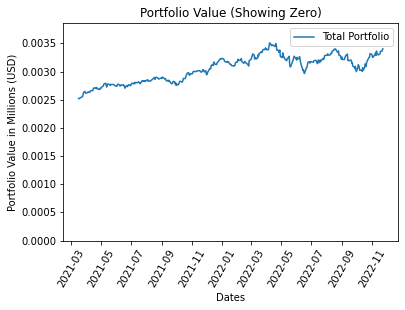

In [85]:
#Graphs of the std/beta portfolio, without correlation stocks
#so that the graph will not automatically be in scientific notation
interval = ['Millions', 1000000] #First element is the name, second element is the number

#Graph the selected portfolio value
plt.plot(final_prices.index, final_prices['total'] / interval[1], label='Total Portfolio')

plt.title('Portfolio Value (Showing Zero)')
plt.xlabel('Dates')
plt.xticks(rotation=60)
plt.ylabel('Portfolio Value in ' + interval[0] + ' (USD)')
#Show zero so that we can get a more accurate idea of how much the portfolio value changed overall, in the grand 
# scheme of things
plt.ylim([0, max(final_prices['total'] / interval[1]) + 0.1 * max(final_prices['total'] / interval[1])])
plt.legend(loc='best')

plt.show()

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

- Ifan Zhao

- Sherry Feng

- Kelly Wang